# Data and code for plots in our paper: [Variational Adversarial Active Learning (ICCV 2019)](https://arxiv.org/abs/1904.00370)

In [258]:
import matplotlib
import pickle
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from matplotlib.axes import Axes
import numpy as np
from IPython.display import Image, display
from PIL import Image
from subprocess import call
from collections import OrderedDict
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import plotly.io as pio;
pio.renderers.default='notebook'
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.express as px

%matplotlib inline

In [125]:
sns.set()
sns.set_style("dark")

def plt_props():
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.style'] = 'normal'
    plt.rcParams['font.variant'] = 'normal' 
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rcParams['lines.linewidth'] = 2.5
    plt.rcParams['lines.markersize'] = 8

m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

In [30]:
def read_the_subfolder_acc(env_name):
    dirs=['40']#'10','15','20','25','30','35',
    accuracy=[]
    for each_dir in dirs:
        crr='/mnt/iscsi/data/Jay/ActiveLearning/'+str(env_name)+'/'+each_dir+'/'
        with open (crr+'acc_'+str(7), 'rb') as fp:accuracy=pickle.load(fp)
 
    return accuracy






array([67.59, 73.75, 77.91, 79.76, 81.62, 83.54, 84.62])

## Image classification results

#### CIFAR 10

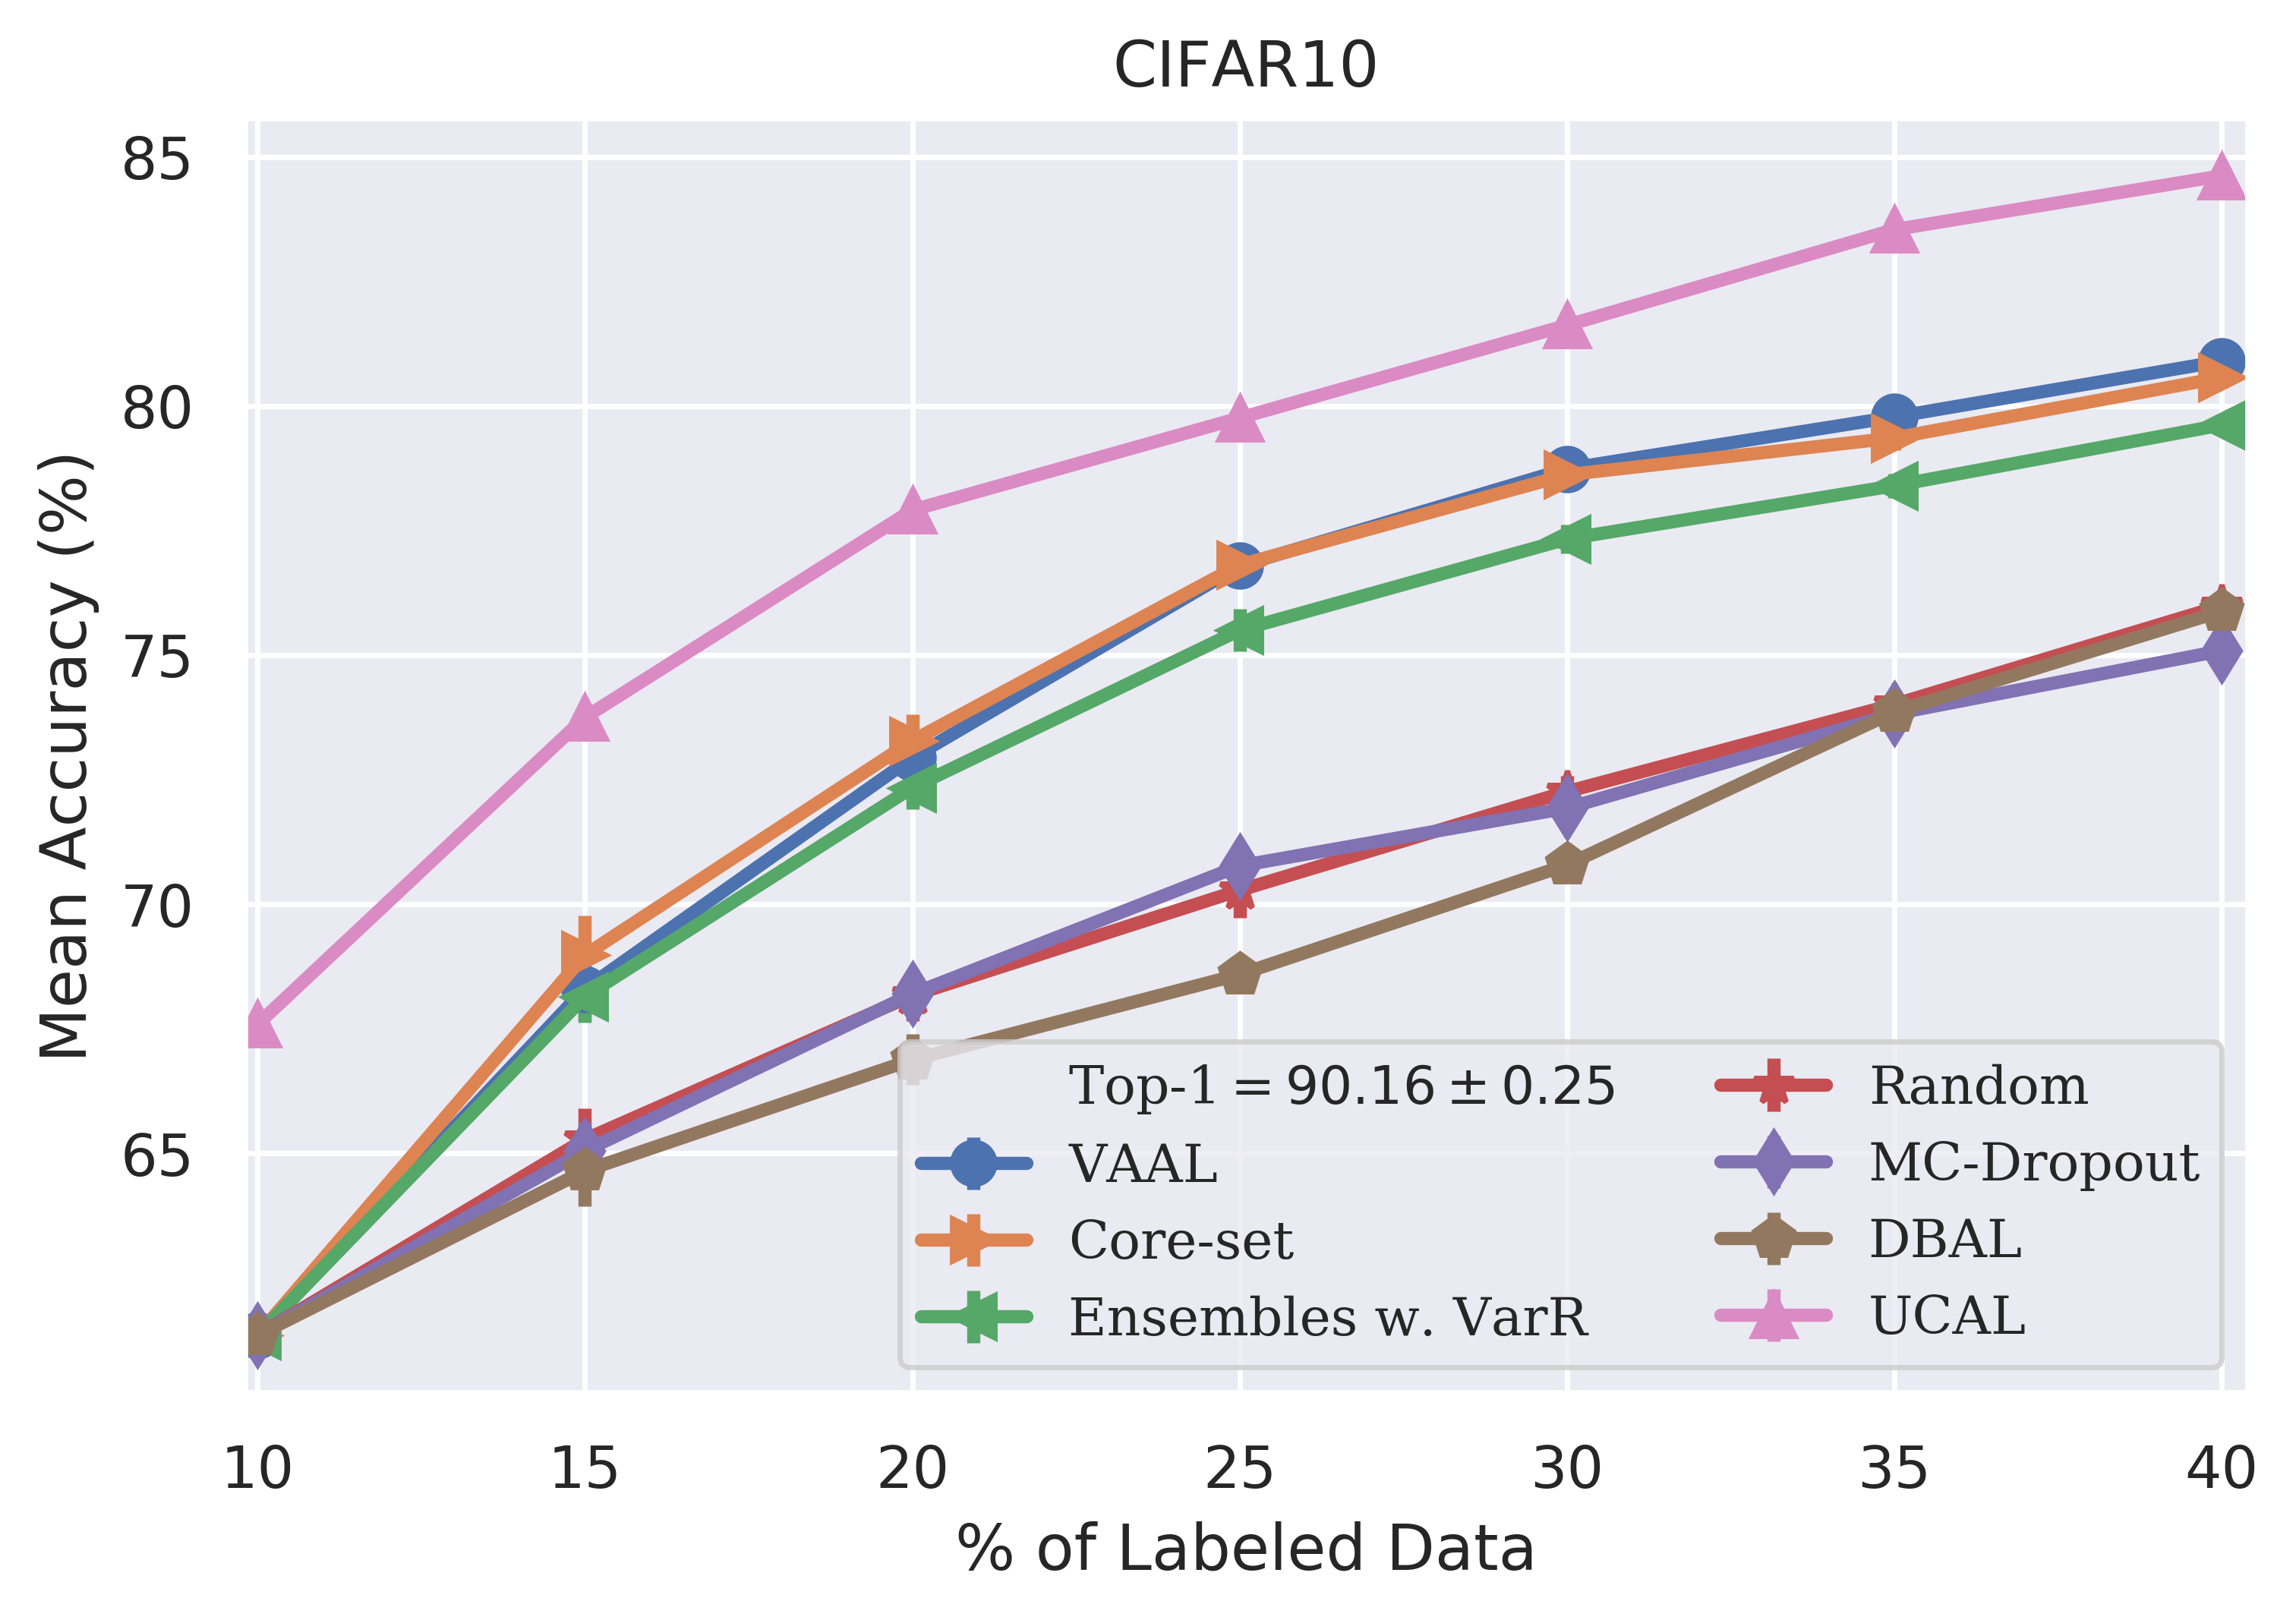

In [126]:



cifar10_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar10_coreset = [61.35, 68.98, 73.28, 76.81, 78.62, 79.36, 80.57]
cifar10_coreset_error = [0, 0.79, 0.53, 0.35, 0.24, 0.25, 0.2]
cifar10_my_method = [61.35, 68.3, 72.94, 76.79, 78.74, 79.78, 80.9]
cifar10_my_method_error = [0, 0.64, 0.33, 0.3, 0.23, 0.2, 0.185]
cifar10_ensemble = [61.35, 68.15, 72.34, 75.5, 77.33, 78.4, 79.62]
cifar10_ensemble_error = [0, 0.53, 0.43, 0.43, 0.295, 0.24, 0.155]
cifar10_dropout = [61.35, 65.05, 68.2, 70.77, 71.93, 73.82, 75.09]
cifar10_dropout_error = [0, 0.58, 0.48, 0.37, 0.235, 0.2, 0.185]
cifar10_random = [61.35, 65.28, 68.17, 70.28, 72.26, 74.01, 75.99]
cifar10_random_error = [0, 0.63, 0.51, 0.55, 0.32, 0.28, 0.21]
cifar10_oracle = [61.35, 65.52, 69.22, 71.82, 74.04, 75.74, 76.84]
cifar10_oracle_error = [0, 0.61, 0.335, 0.3, 0.25, 0.18, 0.16]
cifar10_empirical = [61.35, 64.65, 66.88, 68.59, 70.79, 73.86, 75.88]
cifar10_empirical_error = [0, 0.71, 0.51, 0.33, 0.235, 0.18, 0.16]


fig, ax = plt.subplots(dpi=500)
plt_props()


cifar10_my_method_plot = plt.errorbar(cifar10_ratios, cifar10_my_method, label='VAAL', marker=m['VAAL'] ,yerr=cifar10_my_method_error)
cifar10_coreset_plot = plt.errorbar(cifar10_ratios, cifar10_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar10_coreset_error)
cifar10_ensemble_plot = plt.errorbar(cifar10_ratios, cifar10_ensemble, label='Ensembles w. VarR',marker=m['Ensemble'], yerr=cifar10_ensemble_error)
cifar10_random_plot = plt.errorbar(cifar10_ratios, cifar10_random, label='Random', marker=m['Random'], yerr=cifar10_random_error)
cifar10_dropout_plot = plt.errorbar(cifar10_ratios, cifar10_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar10_dropout_error)
cifar10_empirical_plot = plt.errorbar(cifar10_ratios, cifar10_empirical, label='DBAL', marker=m['DBAL'], yerr=cifar10_empirical_error)

'''
OUR METHOD AT THE LAST
'''
cifar10_UCAL_plot= plt.errorbar(cifar10_ratios, cifar10_UCAL, label='UCAL', marker=m['UCAL'] ,yerr=cifar10_UCAL_error)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.legend(handles=[cifar10_UCAL_plot,cifar10_random_plot, cifar10_coreset_plot, cifar10_my_method_plot, cifar10_empirical_plot, cifar10_dropout_plot, cifar10_ensemble_plot])

ax.set_xlim(9.8, 40.4)
# ax.set_ylim(60.0, 82.0)
plt.plot([], [], ' ', label= r"Top-1" 
                            r"$=90.16 \pm 0.25$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR10')
plt.grid(True)
plt.show()

In [58]:
np.subtract(cifar10_coreset,cifar10_coreset_error)

array([61.35, 68.19, 72.75, 76.46, 78.38, 79.11, 80.37])

In [238]:
df = px.data.iris()
fig = go.Figure()
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

fig = go.Figure()

# Add traces
cifar10_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"



'''
OUR METHOD STAT COMES FIRST
'''
cifar_10_sub_folders=['CF10_M1_S1_R3','CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_10 in cifar_10_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_10))
cifar10_UCAL=np.mean(all_accuracies, axis=0) 
cifar10_UCAL_error=[0]*len(cifar10_UCAL)

print(cifar10_ratios)
print(cifar10_UCAL)
fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar10_UCAL),
                    mode='lines+markers',
                    name='Our Method M1',
                        marker=dict(symbol=0)))

'''OTHER BASE LINES'''
cifar10_coreset = [61.35, 68.98, 73.28, 76.81, 78.62, 79.36, 80.57]
cifar10_coreset_error = [0, 0.79, 0.53, 0.35, 0.24, 0.25, 0.2]
cifar10_my_method = [61.35, 68.3, 72.94, 76.79, 78.74, 79.78, 80.9]
cifar10_my_method_error = [0, 0.64, 0.33, 0.3, 0.23, 0.2, 0.185]
cifar10_ensemble = [61.35, 68.15, 72.34, 75.5, 77.33, 78.4, 79.62]
cifar10_ensemble_error = [0, 0.53, 0.43, 0.43, 0.295, 0.24, 0.155]
cifar10_dropout = [61.35, 65.05, 68.2, 70.77, 71.93, 73.82, 75.09]
cifar10_dropout_error = [0, 0.58, 0.48, 0.37, 0.235, 0.2, 0.185]
cifar10_random = [61.35, 65.28, 68.17, 70.28, 72.26, 74.01, 75.99]
cifar10_random_error = [0, 0.63, 0.51, 0.55, 0.32, 0.28, 0.21]
cifar10_oracle = [61.35, 65.52, 69.22, 71.82, 74.04, 75.74, 76.84]
cifar10_oracle_error = [0, 0.61, 0.335, 0.3, 0.25, 0.18, 0.16]
cifar10_empirical = [61.35, 64.65, 66.88, 68.59, 70.79, 73.86, 75.88]
cifar10_empirical_error = [0, 0.71, 0.51, 0.33, 0.235, 0.18, 0.16]

fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_my_method,cifar10_my_method_error),mode='lines+markers',
                         name='VAAL',  marker=dict(symbol=m['VAAL'])))
fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_coreset,cifar10_coreset_error),mode='lines+markers',
                         name='Core-set',marker=dict(symbol=m['Core-set'])))
fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_ensemble,cifar10_ensemble_error),mode='lines+markers',
                         name='Ensembles w. VarR',  marker=dict(symbol=m['Ensemble'])))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_random,cifar10_random_error),mode='lines+markers',
                         name='MC-Dropout',  marker=dict(symbol=m['Dropout'])))

# fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_oracle,cifar10_oracle_error),mode='lines+markers',name=
#                          'lines+markers'))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_empirical,cifar10_empirical_error),mode='lines+markers',name=
                         'DBAL'))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_dropout,cifar10_dropout_error),mode='lines+markers',
                         name='Random',  marker=dict(symbol=m['Random'])))
# fig.add_trace(go.Scatter(x=[None], y=[None],mode='lines',
#                           marker=dict(size=0, color='rgb(176, 197, 222)')
#                        , showlegend=True,name=r"Top-1= $90.16 \pm 0.25$"))
#fig.show()
fig.update_yaxes(ticks="inside",dtick='2')
fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='lines+markers'))

fig.update_layout(
   legend_title_text='r"$Top-1=90.16 \pm 0.25$"',
    xaxis_title="% Labled Data",
    yaxis_title="Mean Accuracy (%)",
    title={
        'text': "CIFAR 10",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        x=0.8,
        y=0,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[67.81       74.15333333 77.77666667 80.04       81.89666667 83.13
 84.42333333]


### CIFAR 100

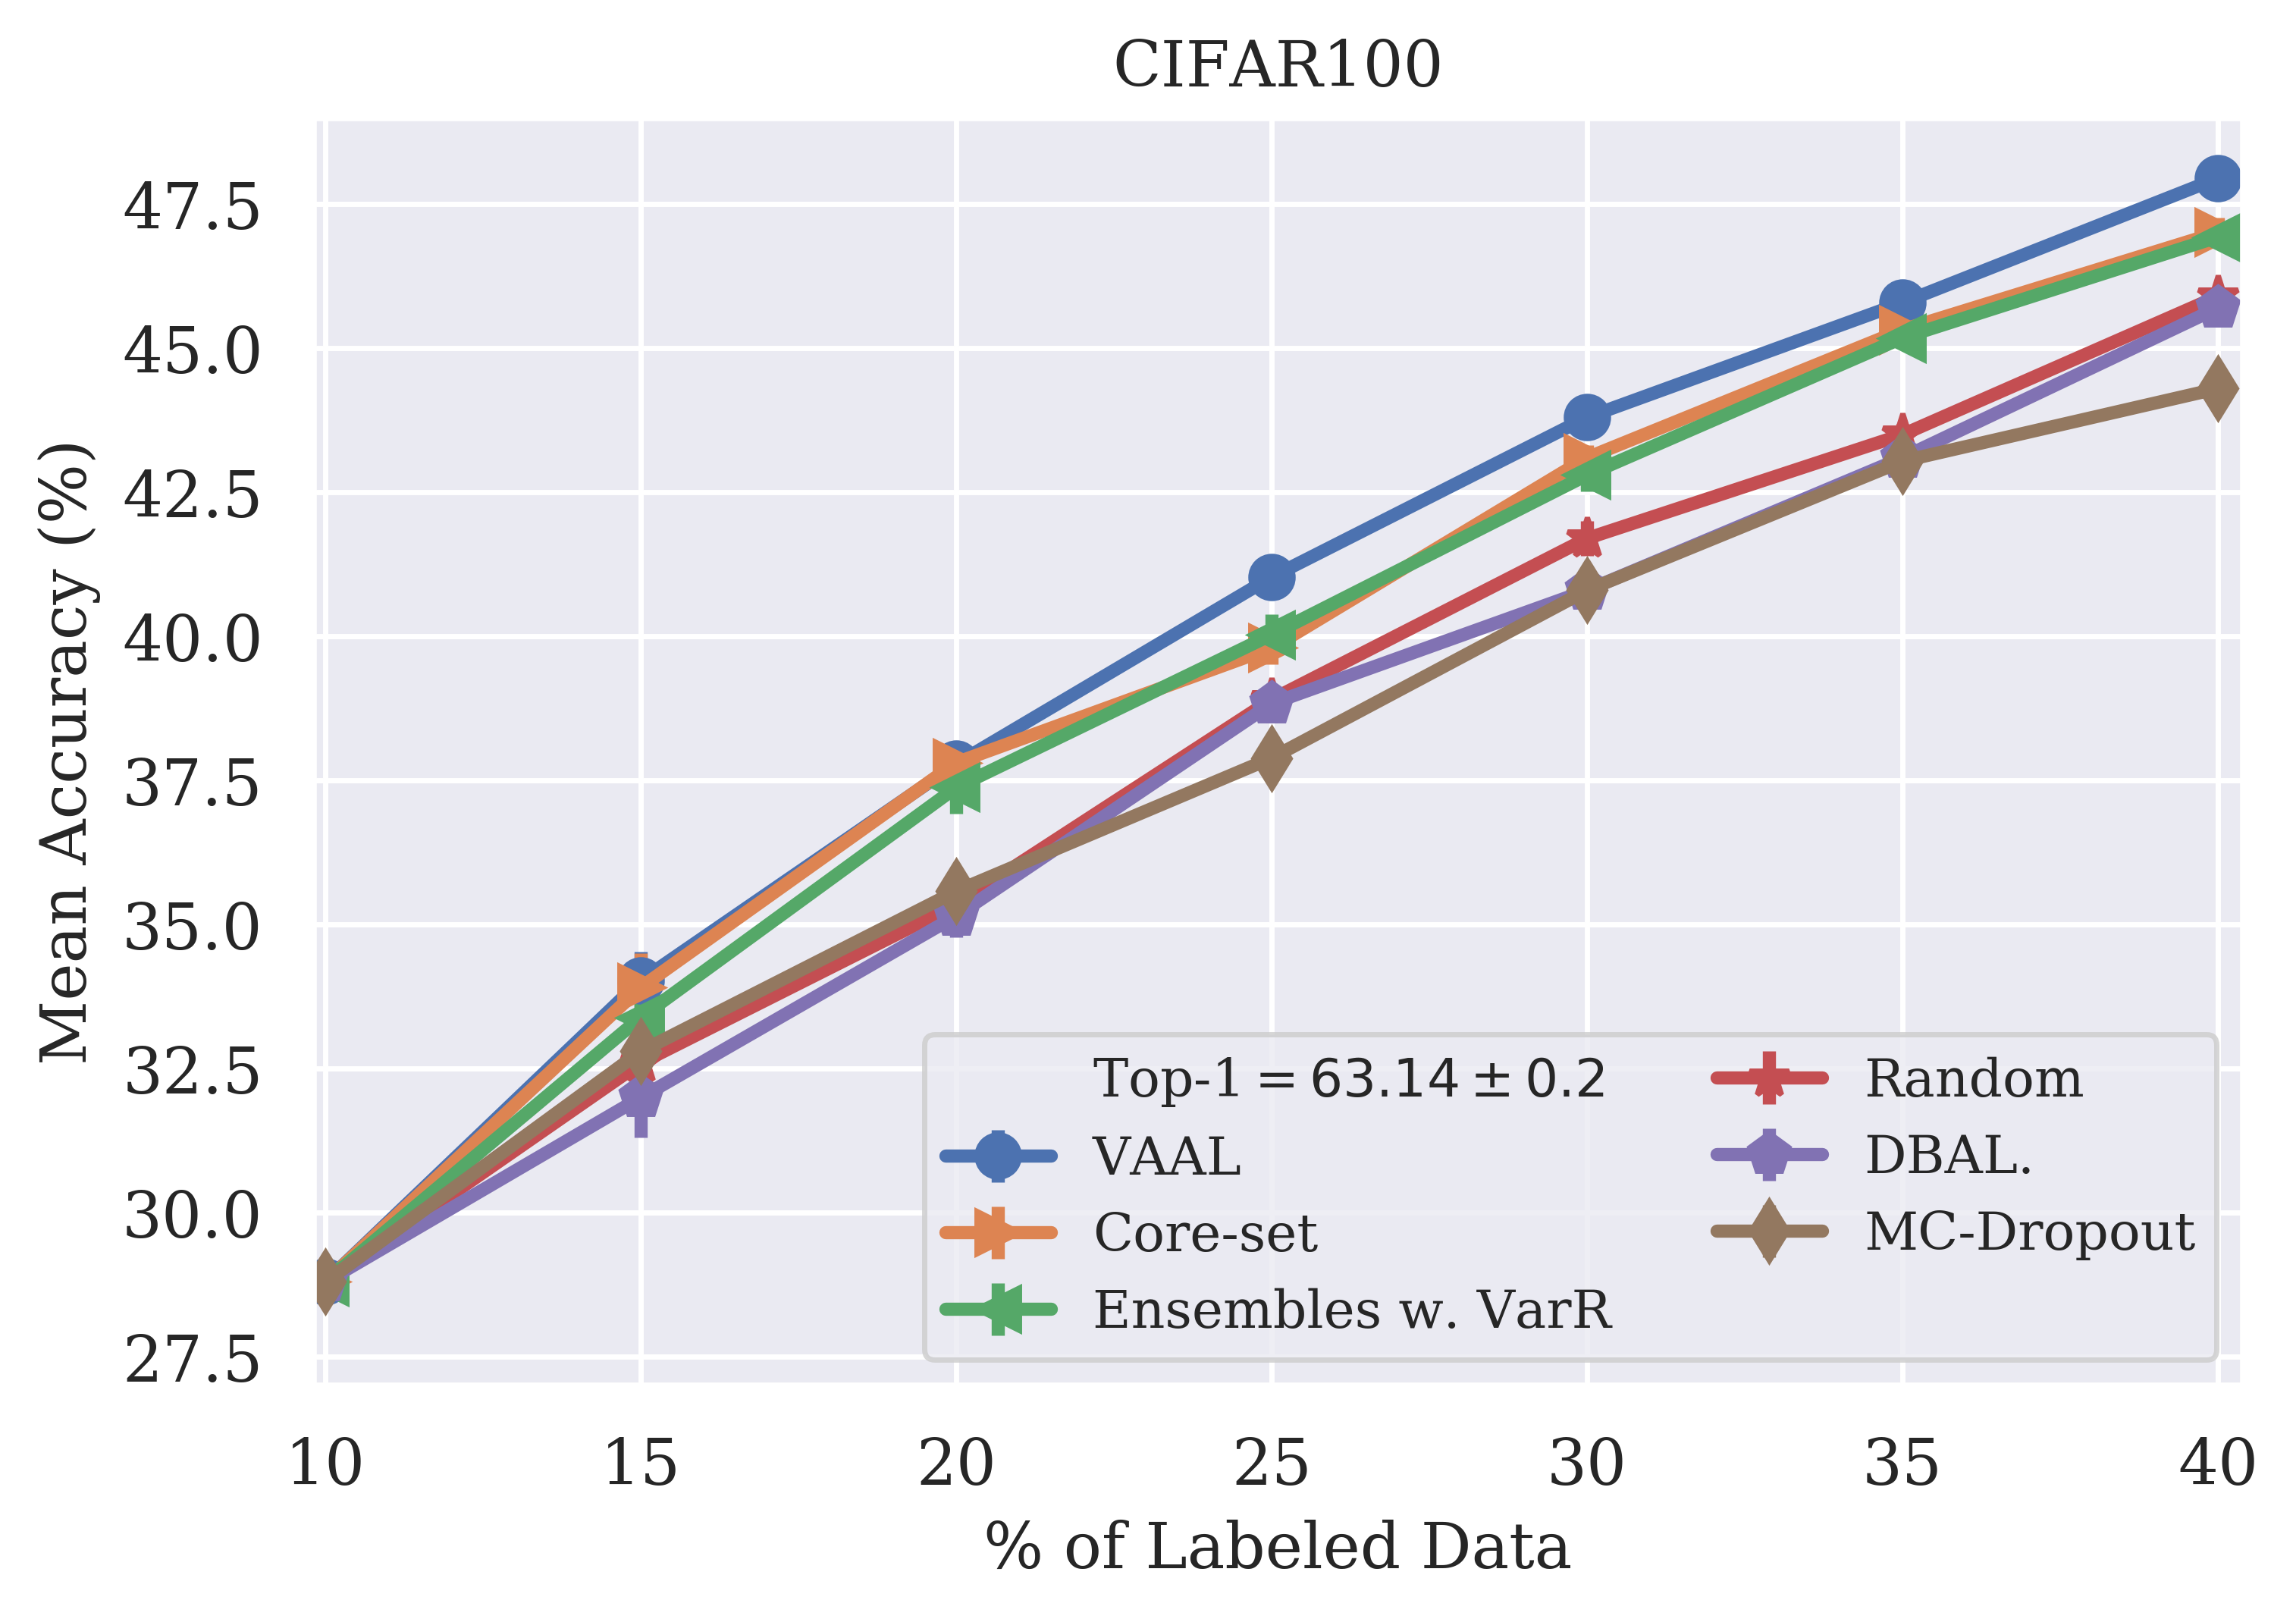

In [137]:
m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"



cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_coreset_error = [0, 0.59, 0.25, 0.29, 0.22, 0.18, 0.25]
cifar100_my_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_my_method_error = [0, 0.495, 0.28, 0.29, 0.23, 0.19, 0.25]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_ensemble_error = [0, 0.54, 0.45, 0.36, 0.28, 0.15, 0.15]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_dropout_error = [0, 0.51, 0.305, 0.29, 0.22, 0.25, 0.28]
cifar100_random = [28.8, 32.6, 35.35, 38.905, 41.7, 43.5, 45.9]
cifar100_random_error = [0, 0.52, 0.29, 0.22, 0.3, 0.19, 0.13]
cifar100_oracle = [28.8, 33.01, 35.99, 39.49, 42.3, 43.88, 46.12]
cifar100_oracle_error = [0, 0.68, 0.24, 0.32, 0.29, 0.35, 0.22]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]
cifar100_empirical_error = [0, 0.70, 0.37, 0.33, 0.30, 0.28, 0.205]

fig, ax = plt.subplots(dpi=500)
plt_props()

cifar100_my_method_plot = plt.errorbar(cifar100_ratios, cifar100_my_method, label='VAAL', marker=m['VAAL'], yerr=cifar100_my_method_error)
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar100_coreset_error)
cifar100_ensemble_plot = plt.errorbar(cifar100_ratios, cifar100_ensemble, label='Ensembles w. VarR', marker=m['Ensemble'], yerr=cifar100_ensemble_error)
cifar100_random_plot = plt.errorbar(cifar100_ratios, cifar100_random, label='Random', marker=m['Random'], yerr=cifar100_random_error)
cifar100_empirical_plot = plt.errorbar(cifar100_ratios, cifar100_empirical, label='DBAL.', marker=m['DBAL'], yerr=cifar100_empirical_error)
cifar100_dropout_plot = plt.errorbar(cifar100_ratios, cifar100_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar100_dropout_error)
plt.legend(handles=[cifar100_random_plot, cifar100_dropout_plot, cifar100_empirical_plot, cifar100_ensemble_plot, cifar100_coreset_plot, cifar100_my_method_plot])

ax.set_ylim(27.0, 49.0)
ax.set_xlim(9.8, 40.4)
plt.plot([], [], ' ', label= r"Top-1" 
                            r"$=63.14 \pm 0.2$")
plt.legend(ncol=2, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR100')
plt.grid(True)
plt.show()

In [243]:
fig = go.Figure()

# Add traces
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"

print(cifar10_ratios)
print(cifar10_UCAL)

'''
OUR METHOD
'''

cifar_100_sub_folders=['CF100_M1_S1_R2']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_100 in cifar_100_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_100))
cifar100_UCAL=np.mean(all_accuracies, axis=0) 
cifar100_UCAL_error=[0]*len(cifar10_UCAL)


fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL),
                    mode='lines+markers',
                    name='Our Method M1',
                        marker=dict(symbol=0)))

cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_coreset_error = [0, 0.59, 0.25, 0.29, 0.22, 0.18, 0.25]
cifar100_my_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_my_method_error = [0, 0.495, 0.28, 0.29, 0.23, 0.19, 0.25]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_ensemble_error = [0, 0.54, 0.45, 0.36, 0.28, 0.15, 0.15]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_dropout_error = [0, 0.51, 0.305, 0.29, 0.22, 0.25, 0.28]
cifar100_random = [28.8, 32.6, 35.35, 38.905, 41.7, 43.5, 45.9]
cifar100_random_error = [0, 0.52, 0.29, 0.22, 0.3, 0.19, 0.13]
cifar100_oracle = [28.8, 33.01, 35.99, 39.49, 42.3, 43.88, 46.12]
cifar100_oracle_error = [0, 0.68, 0.24, 0.32, 0.29, 0.35, 0.22]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]
cifar100_empirical_error = [0, 0.70, 0.37, 0.33, 0.30, 0.28, 0.205]

fig.add_trace(go.Scatter(x=cifar100_ratios, y=np.subtract(cifar100_my_method,cifar100_my_method_error),mode='lines+markers',
                         name='VAAL',  marker=dict(symbol=m['VAAL'])))
fig.add_trace(go.Scatter(x=cifar100_ratios, y=np.subtract(cifar100_coreset,cifar100_coreset_error),mode='lines+markers',
                         name='Core-set',marker=dict(symbol=m['Core-set'])))
fig.add_trace(go.Scatter(x=cifar100_ratios, y=np.subtract(cifar100_ensemble,cifar100_ensemble_error),mode='lines+markers',
                         name='Ensembles w. VarR',  marker=dict(symbol=m['Ensemble'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=np.subtract(cifar100_random,cifar100_random_error),mode='lines+markers',
                         name='MC-Dropout',  marker=dict(symbol=m['Dropout'])))

# fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar10_oracle,cifar10_oracle_error),mode='lines+markers',name=
#                          'lines+markers'))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=np.subtract(cifar100_empirical,cifar100_empirical_error),mode='lines+markers',name=
                         'DBAL'))
fig.add_trace(go.Scatter(x=cifar10_ratios, y=np.subtract(cifar100_dropout,cifar100_dropout_error),mode='lines+markers',
                         name='Random',  marker=dict(symbol=m['Random'])))
# fig.add_trace(go.Scatter(x=[None], y=[None],mode='lines',
#                           marker=dict(size=0, color='rgb(176, 197, 222)')
#                        , showlegend=True,name=r"Top-1= $90.16 \pm 0.25$"))
#fig.show()
fig.update_yaxes(ticks="inside",dtick='2')
fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='lines+markers'))

fig.update_layout(
   legend_title_text='r"$Top-1=63.14 \pm 0.25$"',
    xaxis_title="% Labled Data",
    yaxis_title="Mean Accuracy (%)",
    title={
        'text': "CIFAR 100",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        x=0.8,
        y=0,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[67.81       74.15333333 77.77666667 80.04       81.89666667 83.13
 84.42333333]


### Caltech-256

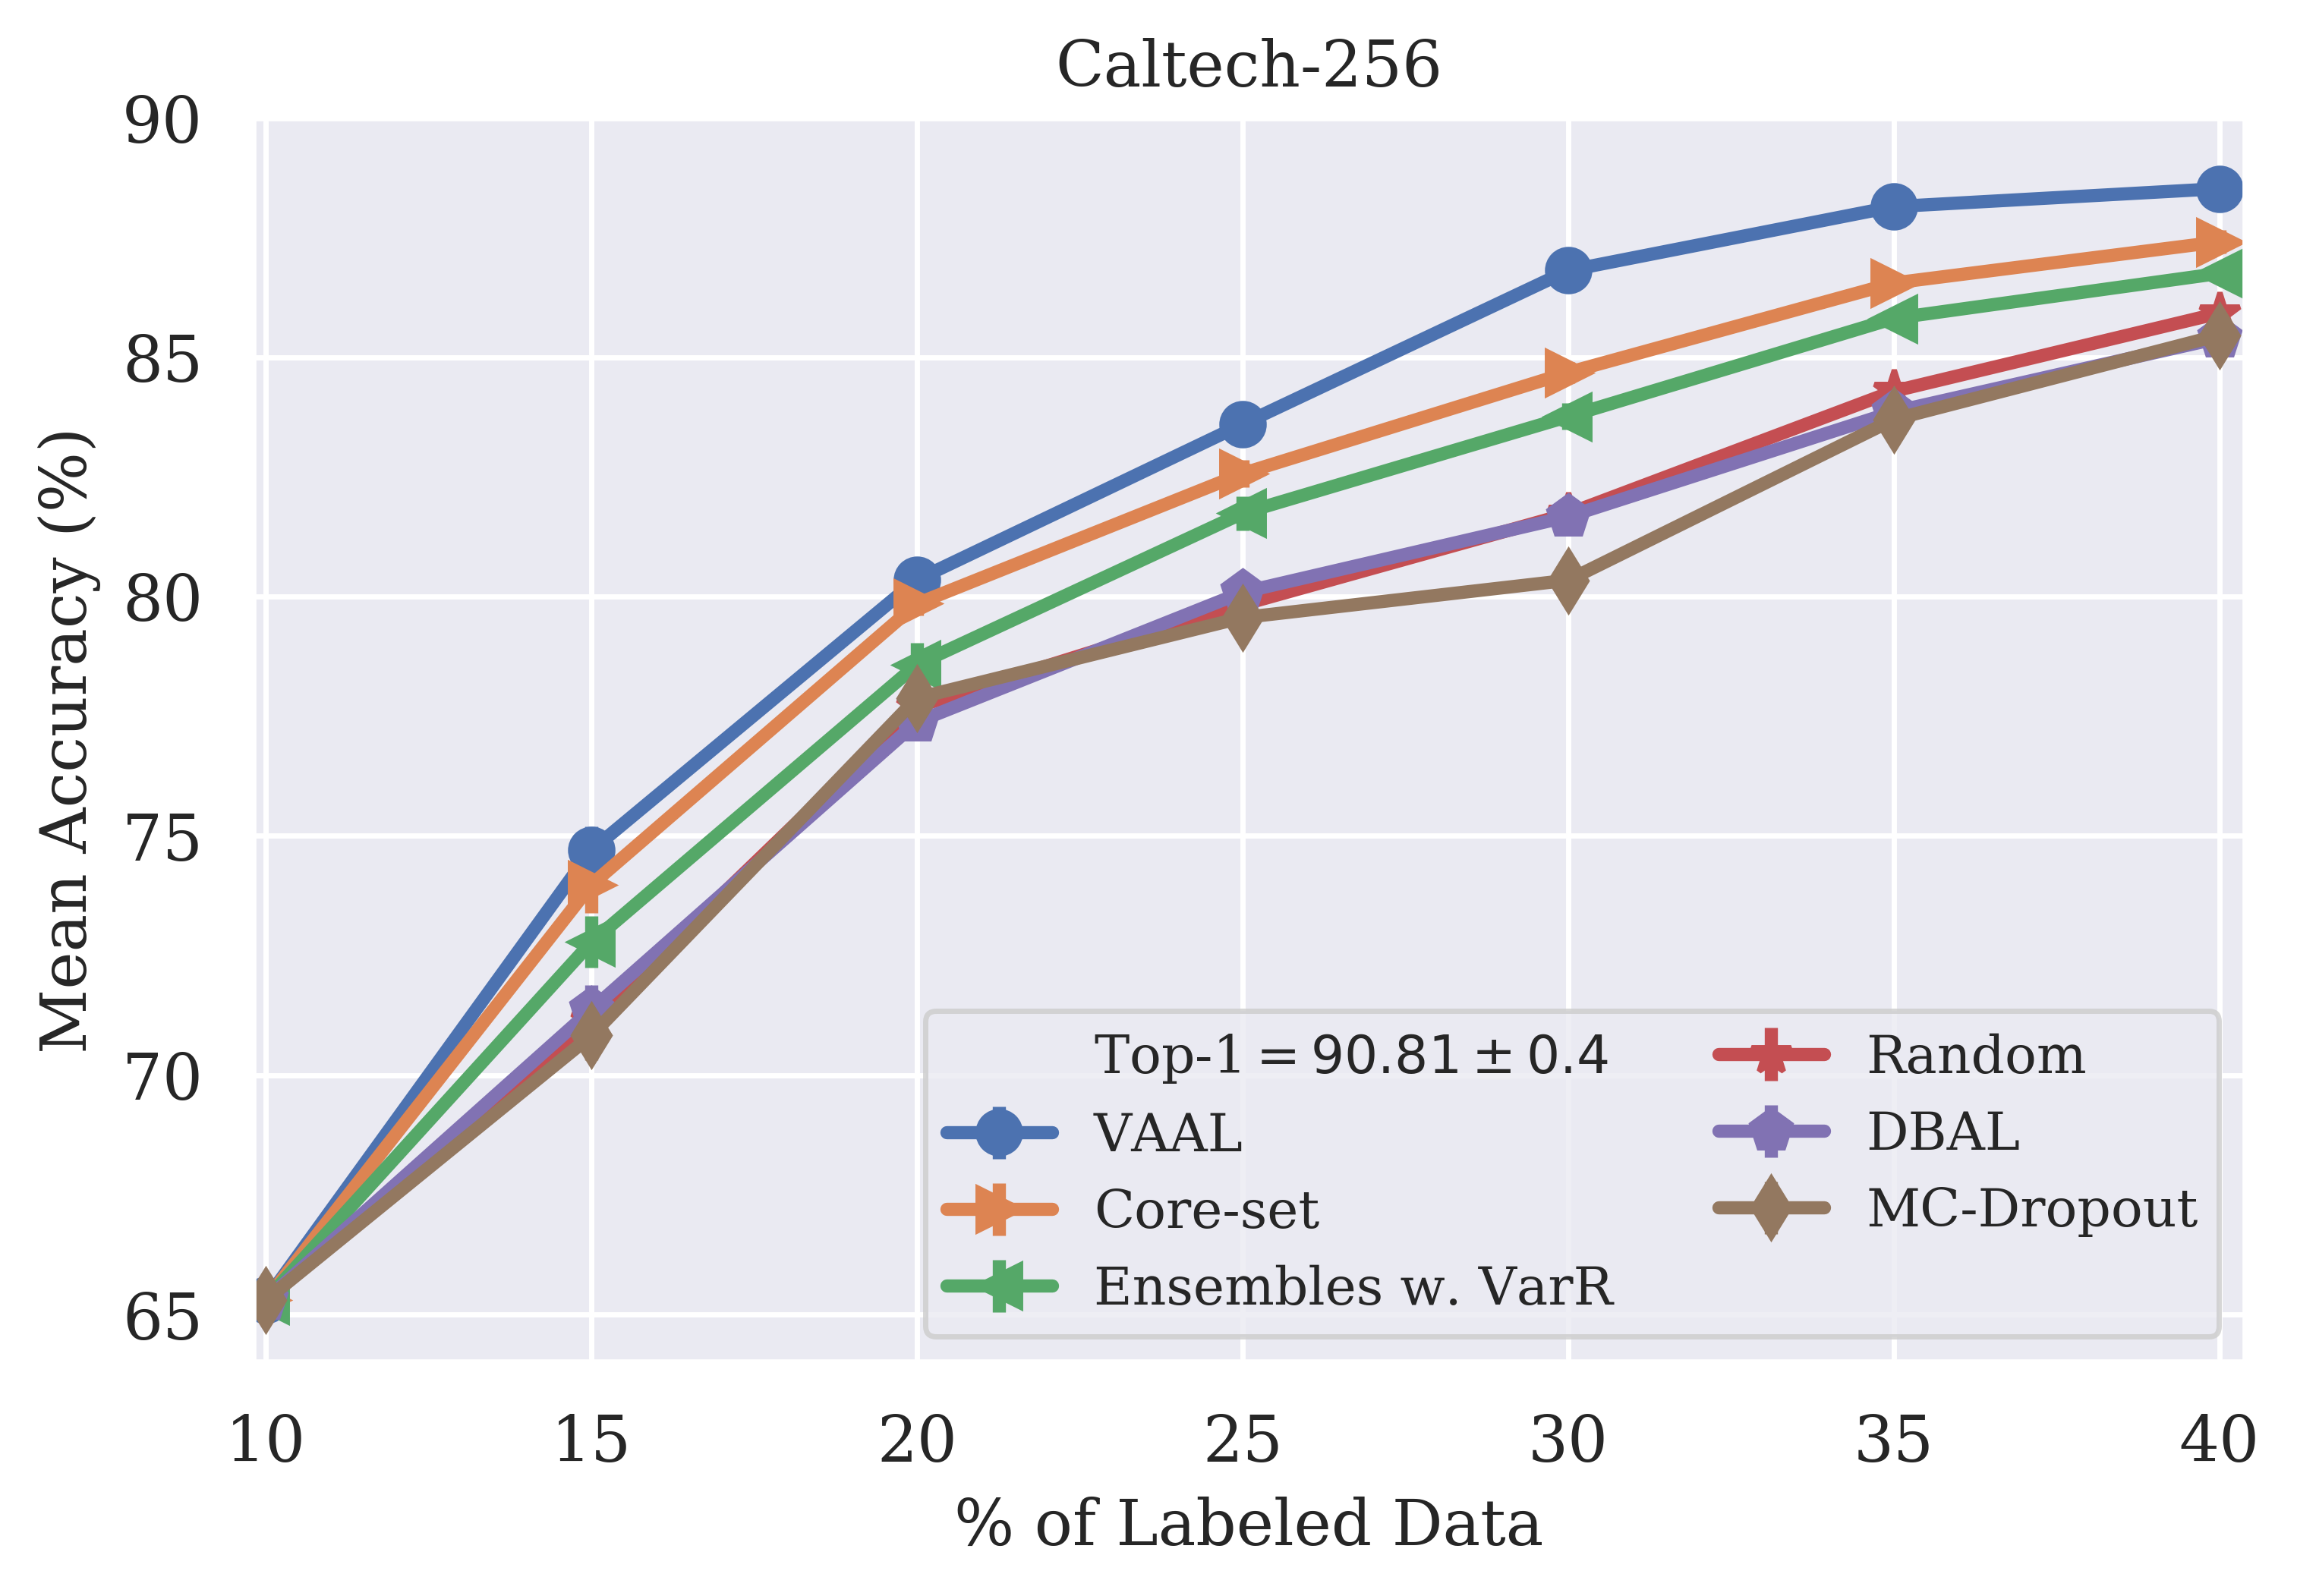

In [146]:
m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

caltech_256_ratios = [100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
caltech_256_coreset = [65.3, 73.98, 79.85, 82.57, 84.68, 86.55, 87.41]
caltech_256_coreset_error = [0, 0.39, 0.3, 0.28, 0.22, 0.13, 0.18]
caltech_256_my_method = [65.3, 74.7, 80.35, 83.6, 86.81, 88.145, 88.52]
caltech_256_my_method_error = [0, 0.55, 0.43, 0.38, 0.25, 0.15, 0.11]
caltech_256_ensemble = [65.3, 72.78, 78.58, 81.74, 83.76, 85.81, 86.75]
caltech_256_ensemble_error = [0, 0.53, 0.35, 0.25, 0.28, 0.22, 0.19]
caltech_256_dropout = [65.3, 70.83, 77.88, 79.56, 80.34, 83.7, 85.46]
caltech_256_dropout_error = [0, 0.7, 0.4, 0.3, 0.25, 0.22, 0.18]
caltech_256_random = [65.3, 71.14, 77.7, 79.83, 81.73, 84.29, 85.92]
caltech_256_random_error = [0, 0.45, 0.35, 0.22, 0.2, 0.15, 0.115]
caltech_256_oracle = [65.3, 71.92, 78.39, 80.58, 82.49, 85.02, 86.54]
caltech_256_oracle_error = [0, 0.64, 0.42, 0.35, 0.22, 0.18, 0.15]
caltech_256_empirical = [65.3, 71.37, 77.38, 80.09, 81.67, 83.86, 85.4]
caltech_256_empirical_error = [0, 0.68, 0.4, 0.35, 0.26, 0.245, 0.18]


m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"

print(cifar10_ratios)
print(cifar10_UCAL)

'''
OUR METHOD
'''

cifar_100_sub_folders=['CF100_M1_S1_R2']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_100 in cifar_100_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_100))
cifar100_UCAL=np.mean(all_accuracies, axis=0) 
cifar100_UCAL_error=[0]*len(cifar10_UCAL)


fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL),
                    mode='lines+markers',
                    name='Our Method',
                        marker=dict(symbol=0)))

# fig, ax = plt.subplots(dpi=500)
# plt_props()

# caltech_256_my_method_plot = plt.errorbar(caltech_256_ratios, caltech_256_my_method, label='VAAL', marker=m['VAAL'], yerr=cifar100_my_method_error)
# caltech_256_coreset_plot = plt.errorbar(caltech_256_ratios, caltech_256_coreset, label='Core-set', marker=m['Core-set'], yerr=cifar100_coreset_error)
# caltech_256_ensemble_plot = plt.errorbar(caltech_256_ratios, caltech_256_ensemble, label='Ensembles w. VarR', marker=m['Ensemble'], yerr=cifar100_ensemble_error)
# caltech_256_random_plot = plt.errorbar(caltech_256_ratios, caltech_256_random, label='Random', marker=m['Random'], yerr=cifar100_random_error)
# caltech_256_empirical_plot = plt.errorbar(caltech_256_ratios, caltech_256_empirical, label='DBAL', marker=m['DBAL'], yerr=cifar100_dropout_error)
# caltech_256_dropout_plot = plt.errorbar(caltech_256_ratios, caltech_256_dropout, label='MC-Dropout', marker=m['Dropout'], yerr=cifar100_dropout_error)

# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# plt.legend(handles=[caltech_256_random_plot, caltech_256_dropout_plot, caltech_256_ensemble_plot, caltech_256_coreset_plot, caltech_256_my_method_plot, caltech_256_empirical_plot])

# ax.set_ylim(64.0, 90.0)
# ax.set_xlim(9.8, 40.4)
# plt.plot([], [], ' ', label= r"Top-1" 
#                             r"$= 90.81 \pm 0.4$")
# plt.legend(ncol=2, loc='lower right')
# fig.tight_layout()

# plt.xlabel('% of Labeled Data')
# plt.ylabel('Mean Accuracy (%)')  
# plt.title('Caltech-256')
# plt.grid(True)
# plt.show()

# Biased Initial Label Pool

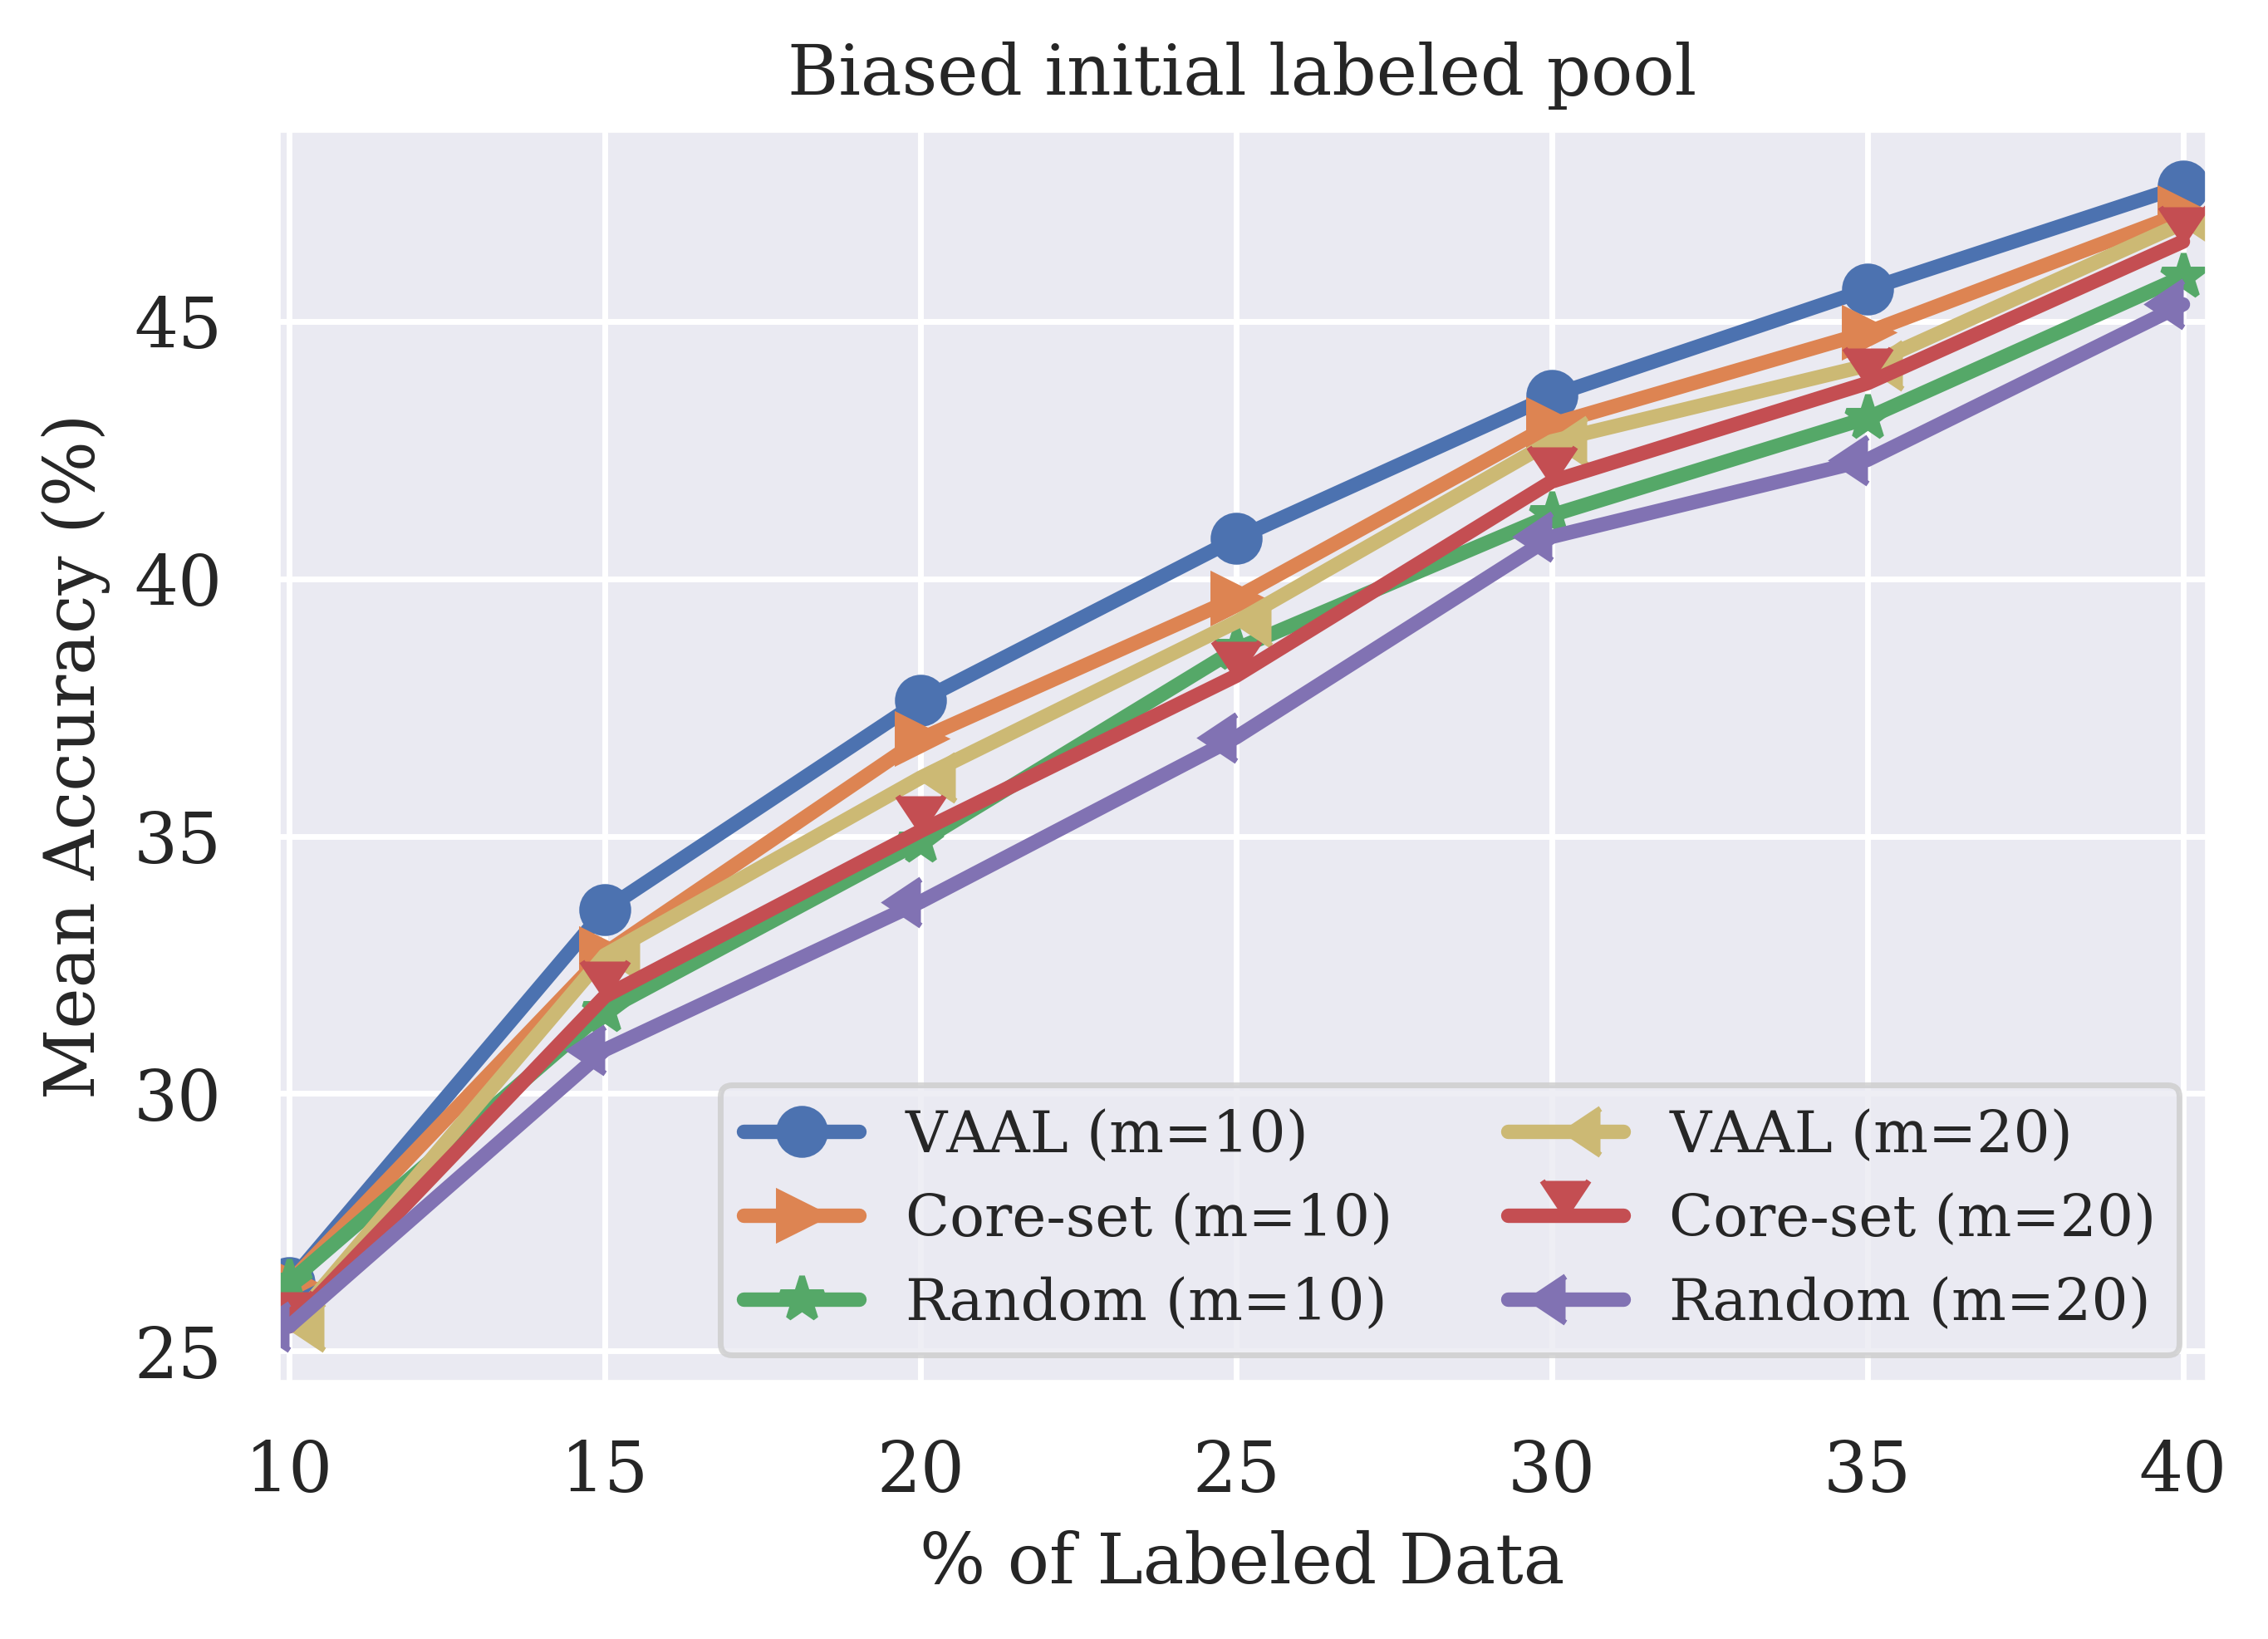

In [147]:
m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

cifar100_coreset_10 = [26.33, 32.725, 36.89, 39.63, 43.0, 44.785, 47.105]
cifar100_random_10 = [26.33, 31.61, 34.895, 38.635, 41.235, 43.125, 45.87]
cifar100_our_10 = [26.33, 33.57, 37.635, 40.78, 43.555, 45.62, 47.63]

cifar100_coreset_20 = [25.48, 31.89, 35.1, 38.115, 41.89, 43.8, 46.55]
cifar100_random_20 = [25.48, 30.85, 33.725, 36.92, 40.815, 42.31, 45.33]
cifar100_our_20 = [25.48, 32.69, 36.135, 39.16, 42.67, 44.145, 46.91]

fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot_10 = plt.errorbar(cifar100_ratios, cifar100_our_10, marker=m['VAAL'], label='VAAL (m=10)')
cifar100_coreset_plot_10 = plt.errorbar(cifar100_ratios, cifar100_coreset_10, marker=m['Core-set'], label='Core-set (m=10)')
cifar100_random_plot_10 = plt.errorbar(cifar100_ratios, cifar100_random_10, marker=m['Random'], label='Random (m=10)')
cifar100_our_method_plot_20 = plt.errorbar(cifar100_ratios, cifar100_our_20, marker=4, label='VAAL (m=20)', color='y')
cifar100_coreset_plot_20 = plt.errorbar(cifar100_ratios, cifar100_coreset_20, marker=7, label='Core-set (m=20)')
cifar100_random_plot_20 = plt.errorbar(cifar100_ratios, cifar100_random_20, marker=8, label='Random (m=20)')

plt.legend(handles=[cifar100_our_method_plot_10, cifar100_coreset_plot_10, cifar100_random_plot_10,
                    cifar100_our_method_plot_20, cifar100_coreset_plot_20, cifar100_random_plot_20,
                    cifar100_random_plot_20])
ax.set_xlim(9.8, 40.4)

plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Biased initial labeled pool')
plt.grid(True)
plt.show()

In [285]:
fig = go.Figure()

# Add traces
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"

print(cifar10_ratios)
print(cifar10_UCAL)

'''
OUR METHOD WITHOUT DECODER FOR 10 and 20 WITH ADAM
'''
cifar100_UCAL_Skip_10_Adam=[33.37,44.58,48.72,54.01,56.58,58.35,60.79]
cifar100_UCAL_error=[0]*len(cifar100_UCAL_Skip_10_Adam)

cifar100_UCAL_Skip_20_Adam=[31.38,42.82,48.67,52.49,55.73,58.06,60.54]
cifar100_UCAL_error=[0]*len(cifar100_UCAL_Skip_10_Adam)

# '''
# OUR METHOD WITHOUT DECODER FOR 10 and 20 WITH SGD
# '''

cifar_100_sub_folders=['NEW_biased_M1_S1_Skip20_20']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_100 in cifar_100_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_100))
cifar100_UCAL_Skip_20_SGD=np.mean(all_accuracies, axis=0) 
cifar100_UCAL_error=[0]*len(cifar10_UCAL)



cifar_100_sub_folders=['NEW_biased_M1_S1_Skip10']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_100 in cifar_100_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_100))
cifar100_UCAL_Skip_10_SGD=np.mean(all_accuracies, axis=0) 
cifar100_UCAL_error=[0]*len(cifar10_UCAL)

# '''
# OUR METHOD WITH DECODER FOR 10 and 20
# '''

# cifar_100_sub_folders=['CF100_biased_M2_S1_R1_10','CF100_biased_M2_S1_R1_GDRIVE_10']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
# all_accuracies=[]
# for cifr_100 in cifar_100_sub_folders:
#     all_accuracies.append(read_the_subfolder_acc(cifr_100))
# cifar100_UCAL_M2_10=np.mean(all_accuracies, axis=0) 
# cifar100_UCAL_error=[0]*len(cifar10_UCAL)

# cifar_100_sub_folders=['CF100_biased_M2_S1_R1_20_GDRIVE_20']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
# all_accuracies=[]
# for cifr_100 in cifar_100_sub_folders:
#     all_accuracies.append(read_the_subfolder_acc(cifr_100))
# cifar100_UCAL_M2_20=np.mean(all_accuracies, axis=0) 
# cifar100_UCAL_error=[0]*len(cifar10_UCAL)


#======================================================================
#======================================================================
fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_Skip_10_Adam),mode='lines+markers',
                    name='Our Method M1+Adam (m=10)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_Skip_20_Adam),mode='lines+markers',
                    name='Our Method M1+Adam (m=20)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_Skip_10_SGD),mode='lines+markers',
                    name='Our Method M1 +SGD (m=10)',marker=dict(symbol=0)))
fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_Skip_20_SGD),mode='lines+markers',
                    name='Our Method M1 +SGD (m=20)',marker=dict(symbol=0)))
#======================================================================
#======================================================================

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

cifar100_coreset_10 = [26.33, 32.725, 36.89, 39.63, 43.0, 44.785, 47.105]
cifar100_random_10 = [26.33, 31.61, 34.895, 38.635, 41.235, 43.125, 45.87]
cifar100_our_10 = [26.33, 33.57, 37.635, 40.78, 43.555, 45.62, 47.63]

cifar100_coreset_20 = [25.48, 31.89, 35.1, 38.115, 41.89, 43.8, 46.55]
cifar100_random_20 = [25.48, 30.85, 33.725, 36.92, 40.815, 42.31, 45.33]
cifar100_our_20 = [25.48, 32.69, 36.135, 39.16, 42.67, 44.145, 46.91]




fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_our_10,mode='lines+markers',
                         name='VAAL (m=10)',  marker=dict(symbol=m['VAAL'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_coreset_10,mode='lines+markers',
                         name='Core-set (m=10)',marker=dict(symbol=m['Core-set'])))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=cifar100_random_10,mode='lines+markers',
                         name='Random (m=10)',  marker=dict(symbol=m['Random'])))
fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_our_20,mode='lines+markers',
                         name='VAAL (m=20)',  marker=dict(symbol=m['VAAL'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_coreset_20,mode='lines+markers',
                         name='Core-set (m=20)',marker=dict(symbol=m['Core-set'])))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=cifar100_random_20,mode='lines+markers',
                         name='Random (m=20)',  marker=dict(symbol=m['Random'])))


# fig.add_trace(go.Scatter(x=[None], y=[None],mode='lines',
#                           marker=dict(size=0, color='rgb(176, 197, 222)')
#                        , showlegend=True,name=r"Top-1= $90.16 \pm 0.25$"))
#fig.show()
fig.update_yaxes(ticks="inside",dtick='4')
fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='lines+markers'))

fig.update_layout(
    legend_orientation="h",
    
    legend_title_text='r"$Top-1=63.14 \pm 0.25$"',
    xaxis_title="% Labled Data",
    yaxis_title="Mean Accuracy (%)",
    title={
        'text': "Biased Initial Label Pool CIFAR 100",
        'y':0.9,
        'x':0.3,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        
#         x=0.8,
#         y=1,
        traceorder="normal",
       
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[67.81       74.15333333 77.77666667 80.04       81.89666667 83.13
 84.42333333]


'/mnt/iscsi/data/Jay/ActiveLearning/CF100_biased_M2_S1_R1/'

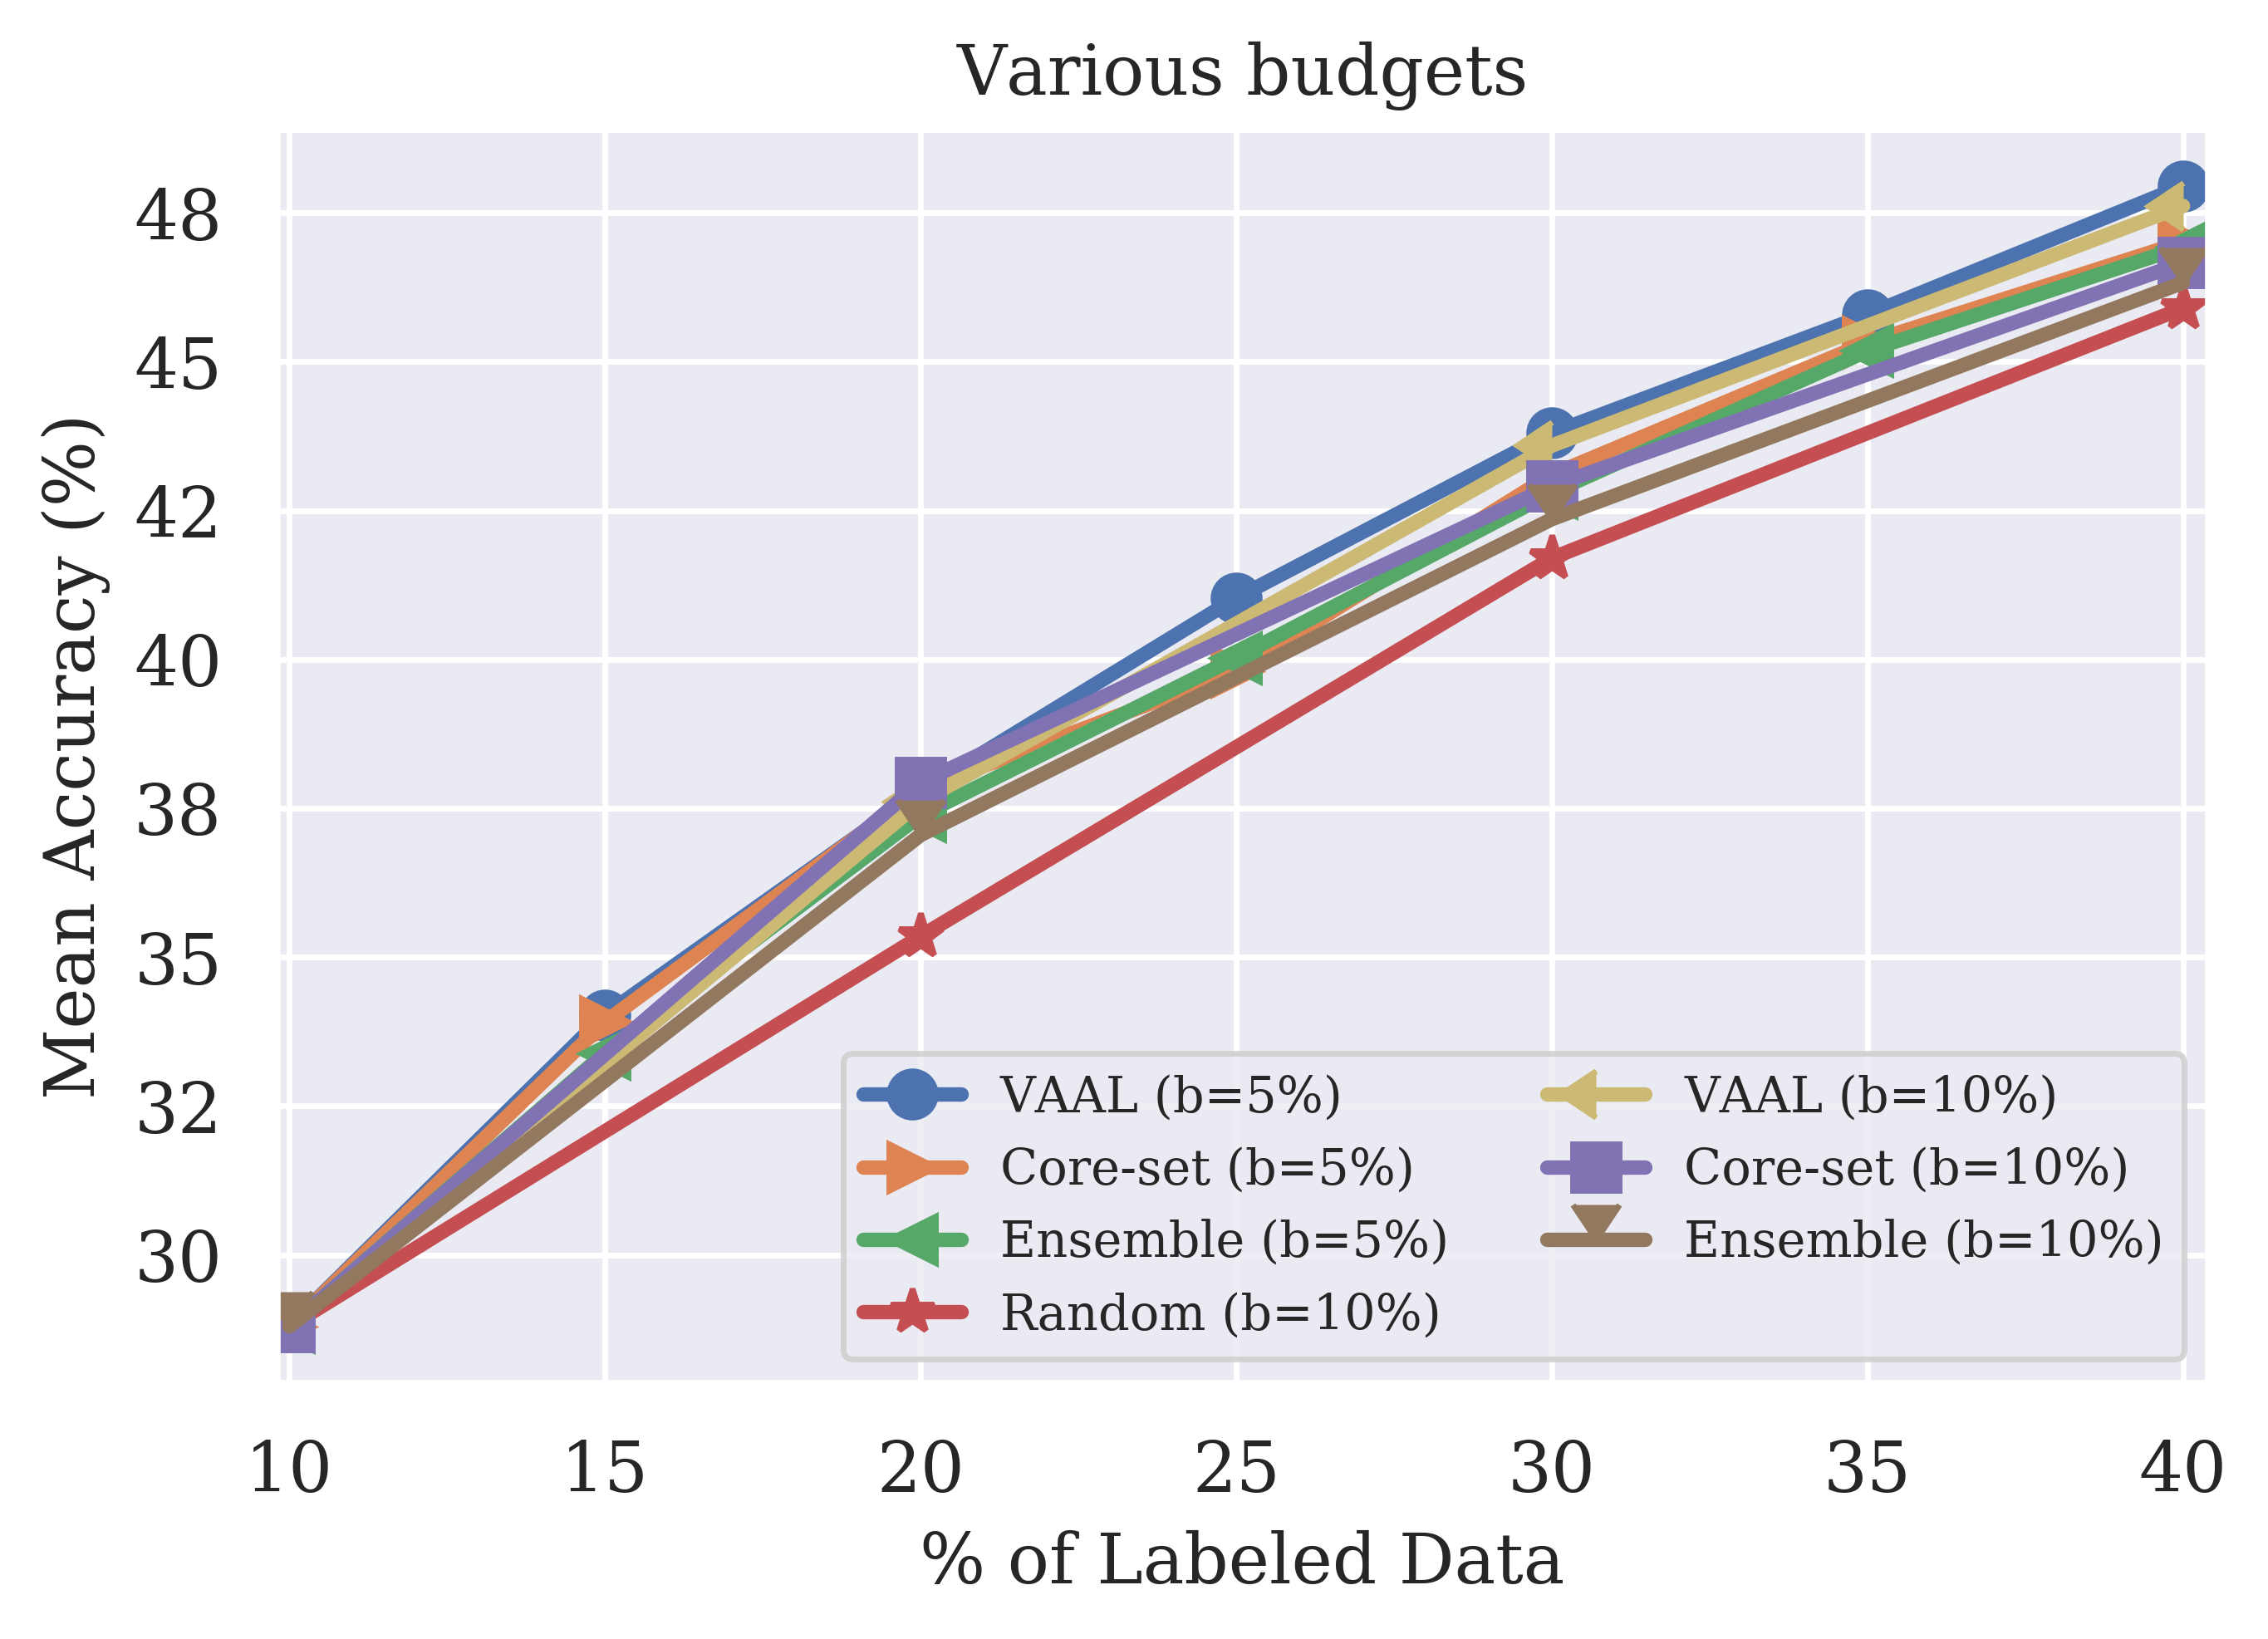

In [208]:
m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_our_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_random = [28.8, 35.35, 41.7, 45.9]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]

cifar100_ratios_10 = [100.*item for item in [0.1, 0.2, 0.3, 0.4]]
cifar100_coreset_10 = [28.8, 37.935, 42.91, 46.66]
cifar100_our_method_10 = [28.8, 37.61, 43.59, 47.615]
cifar100_ensemble_10 = [28.8, 37.05, 42.355, 46.325]
cifar100_dropout_10 = [28.8, 35.035, 40.09, 44.775]
cifar100_empirical_10 = [28.8, 34.89, 40.565, 45.875]

fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot = plt.errorbar(cifar100_ratios, cifar100_our_method, marker=m['VAAL'], label='VAAL (b=5%)')
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset, label='Core-set (b=5%)', marker=m['Core-set'])
cifar100_ensemble_plot = plt.errorbar(cifar100_ratios, cifar100_ensemble, label='Ensemble (b=5%)', marker=m['Ensemble'])
cifar100_random_plot = plt.errorbar(cifar100_ratios_10, cifar100_random, label='Random (b=10%)', marker=m['Random'])
cifar100_our_method_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_our_method_10,  marker=8, label='VAAL (b=10%)', color='y')
cifar100_coreset_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_coreset_10,  marker='s', label='Core-set (b=10%)')
cifar100_ensemble_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_ensemble_10,  marker=7, label='Ensemble (b=10%)')

plt_props()
plt.rcParams['legend.fontsize'] = 8.5

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend(handles=[cifar100_our_method_plot, cifar100_coreset_plot, cifar100_ensemble_plot,
                    cifar100_random_plot, 
                    cifar100_our_method_plot_10, cifar100_coreset_plot_10, cifar100_ensemble_plot_10])
ax.set_xlim(9.8, 40.4)
plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Various budgets')
plt.grid(True)
plt.show()

### Budget from PLotly

In [259]:
fig = go.Figure()
m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"

cifar100_our_ratios=[100.*item for item in [0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4]]
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_our_method = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_ensemble = [28.8, 33.39, 37.38, 40.03, 42.8, 45.18, 46.93]
cifar100_dropout = [28.8, 32.8, 35.58, 37.89, 40.8, 43.04, 44.3]
cifar100_random = [28.8, 35.35, 41.7, 45.9]
cifar100_empirical = [28.8, 32.0, 35.15, 38.835, 40.8, 43.1, 45.7]

cifar100_ratios_10 = [100.*item for item in [0.1, 0.2, 0.3, 0.4]]
cifar100_coreset_10 = [28.8, 37.935, 42.91, 46.66]
cifar100_our_method_10 = [28.8, 37.61, 43.59, 47.615]
cifar100_ensemble_10 = [28.8, 37.05, 42.355, 46.325]
cifar100_dropout_10 = [28.8, 35.035, 40.09, 44.775]
cifar100_empirical_10 = [28.8, 34.89, 40.565, 45.875]


'''
OUR METHOD WITHOUT DECODER FOR 10 and 20
'''
cifar100_UCAL_error=[0]*len(cifar10_UCAL)
#for 10
cifar100_UCAL_M1_5=[32.27,32.84,35.52,38.89,42.29,43.52,45.63,45.75,47.39,50.65,51.71,52.19,53.78]
#for 20
cifar100_UCAL_M1_10=[32.08, 36.19, 42.07, 45.56, 49.64, 51.17, 54.14]

'''
OUR METHOD WITH DECODER FOR 10 and 20
'''
#for 10
cifar100_UCAL_M2_5=[35.85,40.82,45.41,47.21,49.42,51.58,53.49,55.26,56.55,57.87,59.21,61.15,61.62]
#for 20
cifar100_UCAL_M2_10=[26.13,30.24,34.06,36.71,39.85,42.48,45.43]


fig.add_trace(go.Scatter(x=cifar100_our_ratios, y=list(cifar100_UCAL_M2_5),mode='lines+markers',
                    name='Our Method M2 (b=5%)',marker=dict(symbol=0)))

# fig.add_trace(go.Scatter(x=cifar100_ratios, y=list(cifar100_UCAL_M2_10),mode='lines+markers',
#                     name='Our Method M1 (m=20)',marker=dict(symbol=0)))


fig.add_trace(go.Scatter(x=cifar100_our_ratios, y=list(cifar100_UCAL_M1_5),mode='lines+markers',
                    name='Our Method M1 (b=5%)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=list(cifar100_UCAL_M1_10),mode='lines+markers',
                    name='Our Method M1 (b=5%)',marker=dict(symbol=0)))




# cifar100_our_method_plot = plt.errorbar(cifar100_ratios, cifar100_our_method, marker=m['VAAL'], label='VAAL (b=5%)')
# cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset, label='Core-set (b=5%)', marker=m['Core-set'])
# cifar100_ensemble_plot = plt.errorbar(cifar100_ratios, cifar100_ensemble, label='Ensemble (b=5%)', marker=m['Ensemble'])
# cifar100_random_plot = plt.errorbar(cifar100_ratios_10, cifar100_random, label='Random (b=10%)', marker=m['Random'])
# cifar100_our_method_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_our_method_10,  marker=8, label='VAAL (b=10%)', color='y')
# cifar100_coreset_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_coreset_10,  marker='s', label='Core-set (b=10%)')
# cifar100_ensemble_plot_10 = plt.errorbar(cifar100_ratios_10, cifar100_ensemble_10,  marker=7, label='Ensemble (b=10%)')


fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_our_method,mode='lines+markers',
                         name='VAAL (b=5%)',  marker=dict(symbol=m['VAAL'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_coreset,mode='lines+markers',
                         name='Core-set (b=5%)',marker=dict(symbol=m['Core-set'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_ensemble,mode='lines+markers',
                         name='Ensemble (b=5%)',  marker=dict(symbol=m['Random'])))

fig.add_trace(go.Scatter(x=cifar100_ratios_10, y=cifar100_random,mode='lines+markers',
                         name='Random (b=10%)',marker=dict(symbol=m['Core-set'])))


fig.add_trace(go.Scatter(x=cifar100_ratios_10, y=cifar100_our_method_10,mode='lines+markers',
                         name='VAAL (b=10%)',  marker=dict(symbol=m['Random'])))

fig.add_trace(go.Scatter(x=cifar100_ratios_10, y=cifar100_coreset_10,mode='lines+markers',
                         name='Core-set (b=10%)',marker=dict(symbol=m['Core-set'])))


fig.add_trace(go.Scatter(x=cifar100_ratios_10, y=cifar100_ensemble_10,mode='lines+markers',
                         name='Ensemble (b=10%)',  marker=dict(symbol=m['VAAL'])))






# fig.add_trace(go.Scatter(x=[None], y=[None],mode='lines',
#                           marker=dict(size=0, color='rgb(176, 197, 222)')
#                        , showlegend=True,name=r"Top-1= $90.16 \pm 0.25$"))
#fig.show()
fig.update_yaxes(ticks="inside",dtick='3')
fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='lines+markers'))

fig.update_layout(
   legend_title_text='r"$Top-1=63.14 \pm 0.25$"',
    xaxis_title="% Labled Data",
    yaxis_title="Mean Accuracy (%)",
    title={
        'text': "CIFAR 100 Various budgets",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        x=1,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()



### Noisy Oracle

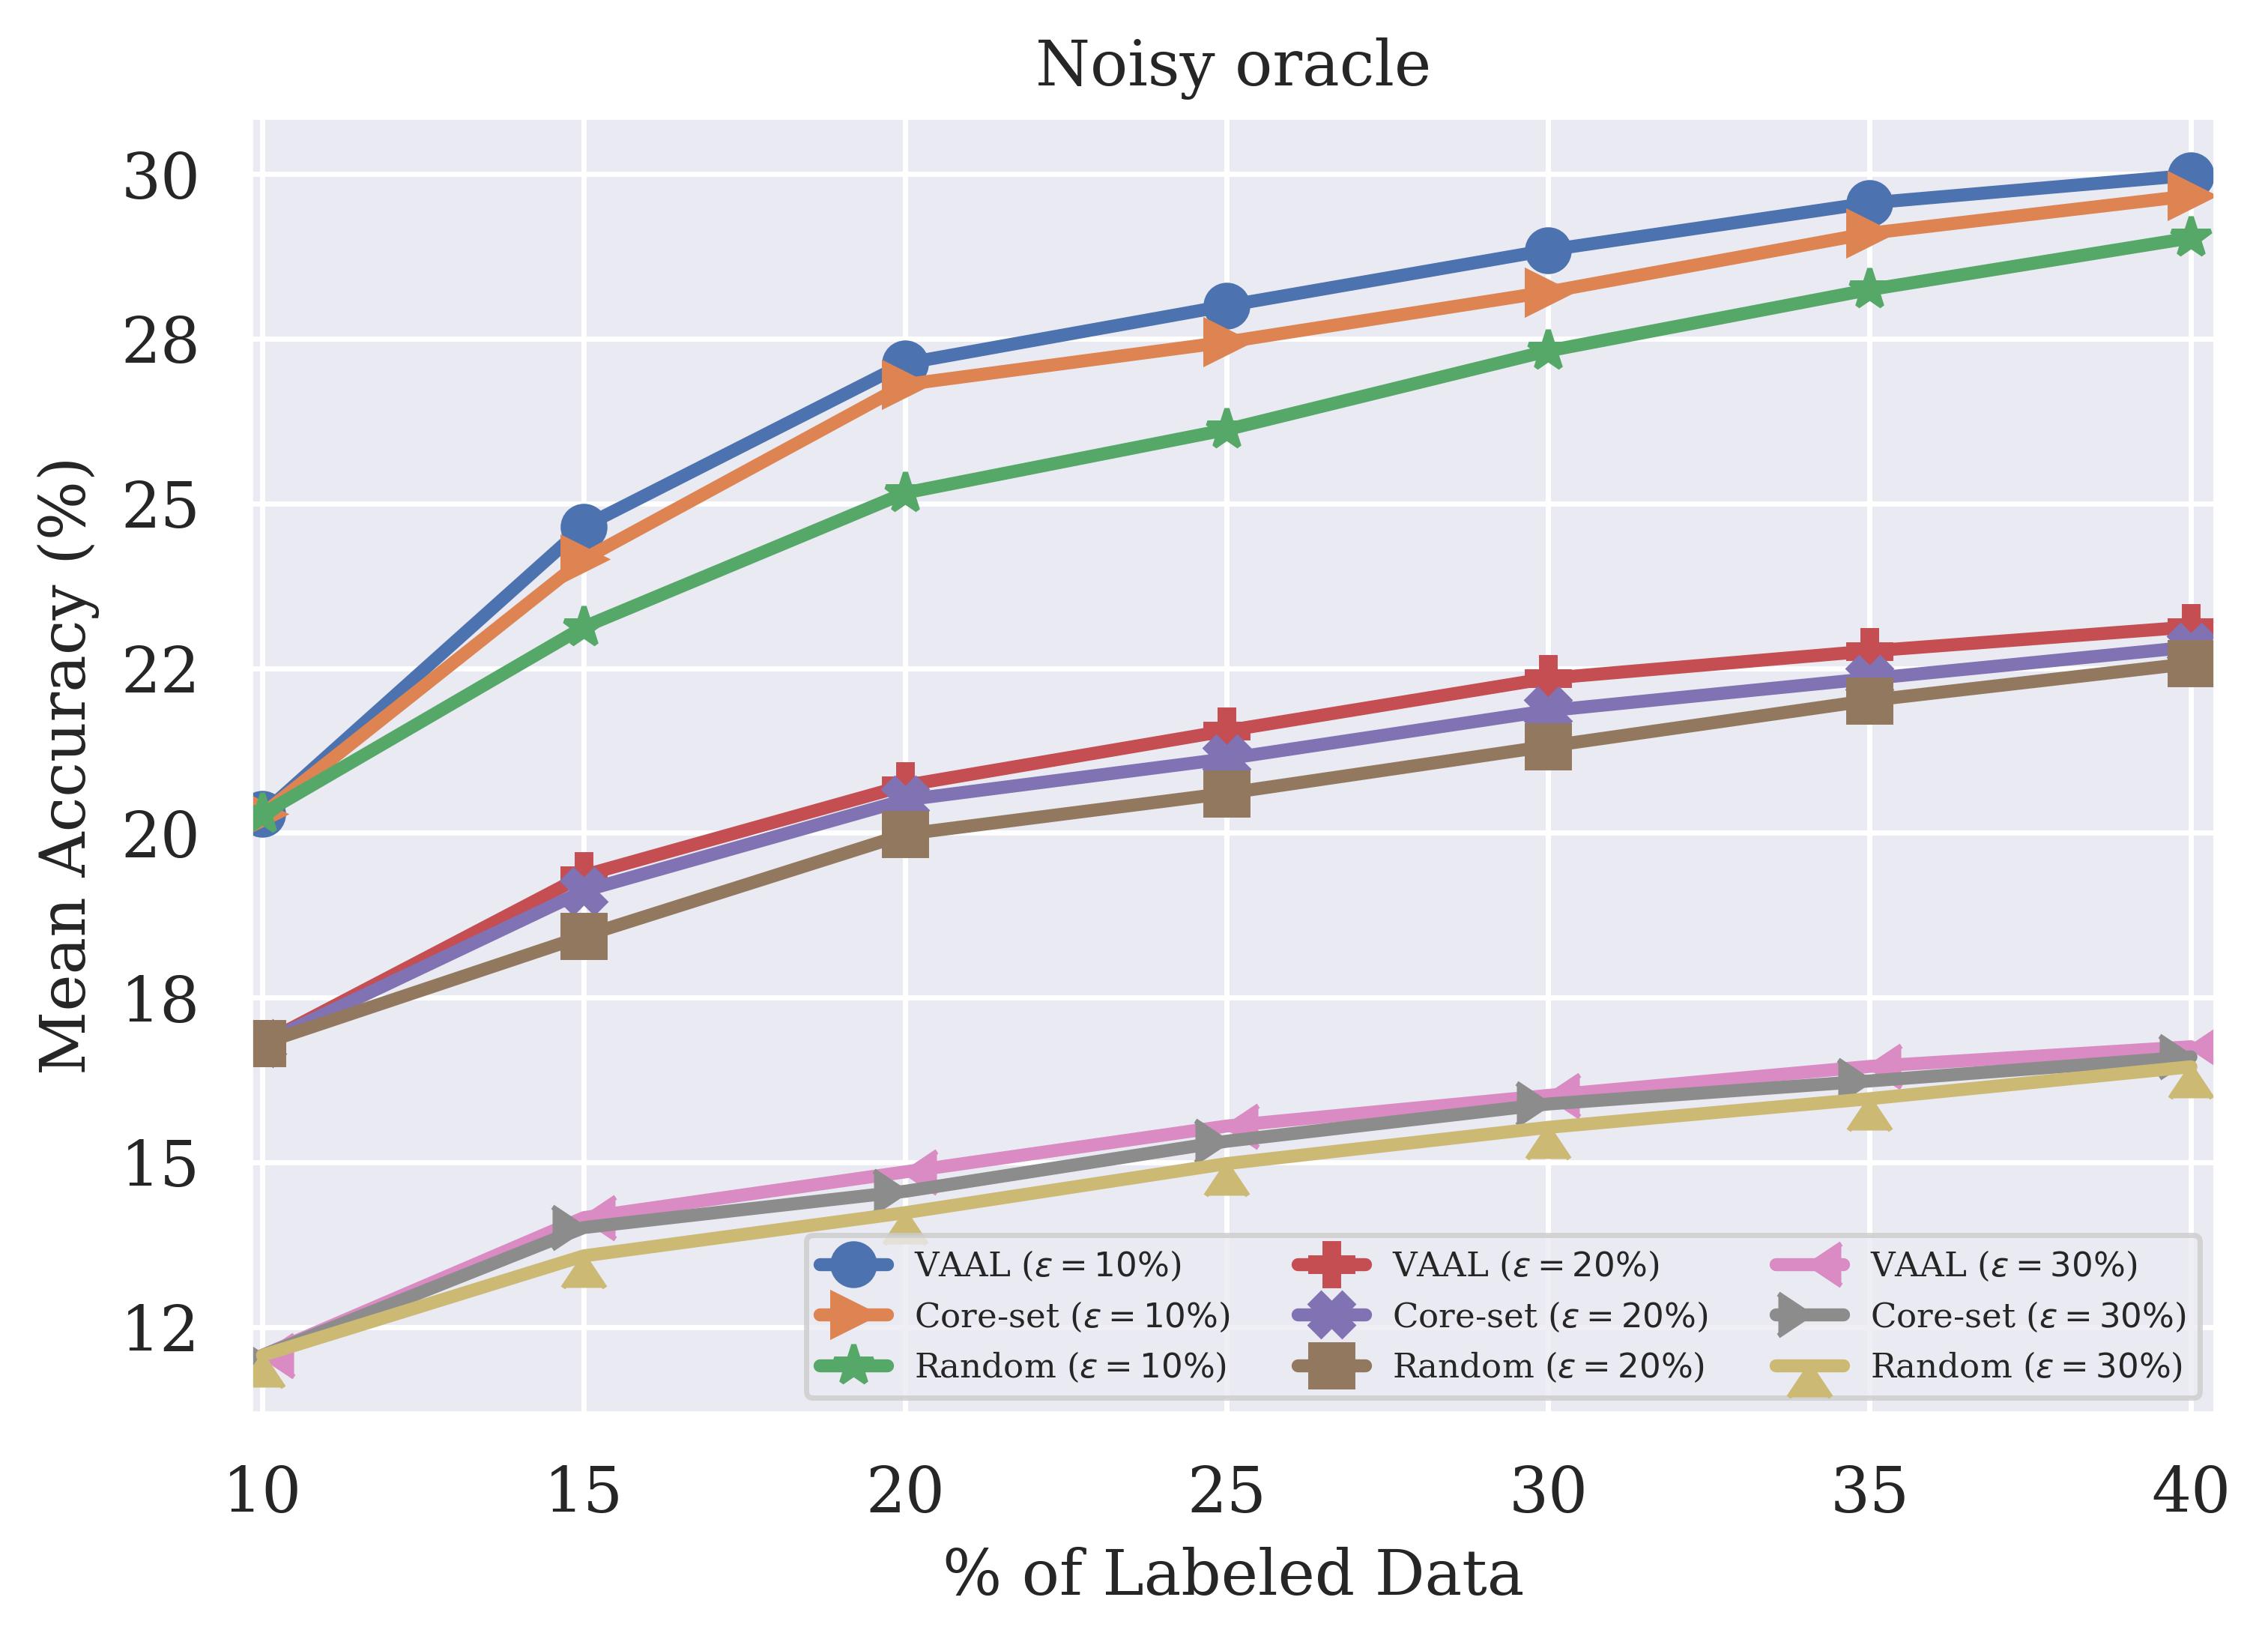

In [159]:
m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_random_noise_ten_rand = [20.285, 23.125, 25.16, 26.12, 27.315, 28.245, 29.03]
cifar100_random_noise_ten_core = [20.285, 24.155, 26.805, 27.45, 28.21, 29.1, 29.67]
cifar100_random_noise_ten_our = [20.285, 24.65, 27.125, 28.0, 28.845, 29.56, 29.98]

cifar100_random_noise_twenty_rand = [16.805, 18.435, 19.98, 20.6, 21.315, 22.01, 22.57]
cifar100_random_noise_twenty_core = [16.805, 19.12, 20.5, 21.125, 21.855, 22.34, 22.82]
cifar100_random_noise_twenty_our = [16.805, 19.355, 20.72, 21.55, 22.345, 22.76, 23.125]

cifar100_random_noise_thirty_rand = [12.07, 13.58, 14.235, 14.98, 15.53, 15.965, 16.45]
cifar100_random_noise_thirty_core = [12.07, 14.01, 14.56, 15.32, 15.885, 16.235, 16.6]
cifar100_random_noise_thirty_our = [12.07, 14.16, 14.855, 15.55, 16.015, 16.455, 16.754]

fig, ax = plt.subplots(dpi=500)
plt_props()

cifar100_random_noise_ten_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_our, marker=m['VAAL'], label='VAAL ($\epsilon=10\%$)')
cifar100_random_noise_ten_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_core, marker=m['Core-set'], label='Core-set ($\epsilon=10\%$)')
cifar100_random_noise_ten_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_ten_rand, marker=m['Random'], label='Random ($\epsilon=10\%$)')
cifar100_random_noise_twenty_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_our, marker='P', label='VAAL ($\epsilon=20\%$)')
cifar100_random_noise_twenty_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_core, marker='X', label='Core-set ($\epsilon=20\%$)')
cifar100_random_noise_twenty_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_twenty_rand, marker='s', label='Random ($\epsilon=20\%$)')
cifar100_random_noise_thirty_our_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_our, marker=4, label='VAAL ($\epsilon=30\%$)')
cifar100_random_noise_thirty_core_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_core, marker=5, label='Core-set ($\epsilon=30\%$)')
cifar100_random_noise_thirty_rand_plot = plt.errorbar(cifar100_ratios, cifar100_random_noise_thirty_rand, marker=6, label='Random ($\epsilon=30\%$)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend(handles=[cifar100_random_noise_ten_our_plot, cifar100_random_noise_ten_core_plot, cifar100_random_noise_ten_rand_plot,
                    cifar100_random_noise_twenty_our_plot, cifar100_random_noise_twenty_core_plot, cifar100_random_noise_twenty_rand_plot,
                    cifar100_random_noise_thirty_our_plot, cifar100_random_noise_thirty_core_plot, cifar100_random_noise_thirty_rand_plot])
ax.set_xlim(9.8, 40.4)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.9,
                 box.width, box.height * 0.01])

plt.rcParams['legend.fontsize'] = 6.5
plt.legend(ncol=3, loc='lower right')
fig.tight_layout()

plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('Noisy oracle')
plt.grid(True)
plt.show()

In [257]:
fig = go.Figure()

# Add traces
cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

m={}
m['VAAL']=24#'o'
m['Core-set']=8#'>'
m['Ensemble']=7#"<"
m['Random']=17#'*'
m['Dropout']=23#'d'
m['DBAL']=13#'p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']=5#"^"

print(cifar10_ratios)
print(cifar10_UCAL)

'''
OUR METHOD WITHOUT DECODER FOR 10 and 20
'''
cifar100_UCAL_error=[0]*len(cifar10_UCAL)
#for 10
cifar100_UCAL_M1_10=[22.8,25.49,29.53,32.9,35.1,37.13,40.5]
#for 20
cifar100_UCAL_M1_20=[21.12,23.98,25.24,28.33,32.33,33.6,34.97]
#for 30
cifar100_UCAL_M1_30=[19.32,20.59,22.74,26.05,26.66,28.39,30.56]

'''
OUR METHOD WITH DECODER FOR 10 and 20
'''
#for 10
cifar100_UCAL_M2_10=[29.17,32.72,36.55,42.33,44.51,47.79,50.57]
#for 20
cifar100_UCAL_M2_20=[26.13,30.24,34.06,36.71,39.85,42.48,45.43]
#for 30
cifar100_UCAL_M2_30=[22.43,25.78,28.33,32.4,35.83,37.22,40.83]

#======================================================================
#======================================================================
fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M2_10),mode='lines+markers',
                    name='$Our Method M2 (\epsilon=10\%)$)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M2_20),mode='lines+markers',
                    name='$Our Method M2 (\epsilon=20\%)$)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M2_30),mode='lines+markers',
                    name='$Our Method M2 (\epsilon=30\%)$)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M1_10),mode='lines+markers',
                    name='$Our Method M1 (\epsilon=10\%)$)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M1_20),mode='lines+markers',
                    name='$Our Method M1 (\epsilon=20\%)$)',marker=dict(symbol=0)))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=list(cifar100_UCAL_M1_30),mode='lines+markers',
                    name='$Our Method M1 (\epsilon=30\%)$)',marker=dict(symbol=0)))




#======================================================================
#======================================================================

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

cifar100_random_noise_ten_rand = [20.285, 23.125, 25.16, 26.12, 27.315, 28.245, 29.03]
cifar100_random_noise_ten_core = [20.285, 24.155, 26.805, 27.45, 28.21, 29.1, 29.67]
cifar100_random_noise_ten_our = [20.285, 24.65, 27.125, 28.0, 28.845, 29.56, 29.98]

cifar100_random_noise_twenty_rand = [16.805, 18.435, 19.98, 20.6, 21.315, 22.01, 22.57]
cifar100_random_noise_twenty_core = [16.805, 19.12, 20.5, 21.125, 21.855, 22.34, 22.82]
cifar100_random_noise_twenty_our = [16.805, 19.355, 20.72, 21.55, 22.345, 22.76, 23.125]

cifar100_random_noise_thirty_rand = [12.07, 13.58, 14.235, 14.98, 15.53, 15.965, 16.45]
cifar100_random_noise_thirty_core = [12.07, 14.01, 14.56, 15.32, 15.885, 16.235, 16.6]
cifar100_random_noise_thirty_our = [12.07, 14.16, 14.855, 15.55, 16.015, 16.455, 16.754]




fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_ten_our,mode='lines+markers',
                         name='$VAAL (\epsilon=10\%)$)',  marker=dict(symbol=m['VAAL'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_ten_core,mode='lines+markers',
                         name='$CoreSet (\epsilon=10\%)$)',marker=dict(symbol=m['Core-set'])))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=cifar100_random_noise_ten_rand,mode='lines+markers',
                         name='$Random (\epsilon=10\%)$)',  marker=dict(symbol=m['Random'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_twenty_core,mode='lines+markers',
                         name='$CoreSet (\epsilon=20\%)$)',marker=dict(symbol=m['Core-set'])))
fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_twenty_our,mode='lines+markers',
                         name='$VAAL (\epsilon=20\%)$)',  marker=dict(symbol=m['VAAL'])))


fig.add_trace(go.Scatter(x=cifar10_ratios, y=cifar100_random_noise_twenty_rand,mode='lines+markers',
                         name='$Random (\epsilon=20\%)$)',  marker=dict(symbol=m['Random'])))

fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_thirty_core,mode='lines+markers',
                         name='$CoreSet (\epsilon=30\%)$)',marker=dict(symbol=m['Core-set'])))


fig.add_trace(go.Scatter(x=cifar100_ratios, y=cifar100_random_noise_thirty_our,mode='lines+markers',
                         name='$VAAL (\epsilon=30\%)$)',  marker=dict(symbol=m['VAAL'])))

fig.add_trace(go.Scatter(x=cifar10_ratios, y=cifar100_random_noise_thirty_rand,mode='lines+markers',
                         name='$Random (\epsilon=10\%)$)',  marker=dict(symbol=m['Random'])))





# fig.add_trace(go.Scatter(x=[None], y=[None],mode='lines',
#                           marker=dict(size=0, color='rgb(176, 197, 222)')
#                        , showlegend=True,name=r"Top-1= $90.16 \pm 0.25$"))
#fig.show()
fig.update_yaxes(ticks="inside",tickvals=[12,14,16, 18, 25, 35,40,45,50])#nticks=10,dtick='2')
fig.update_traces(marker=dict(size=12,
                              
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='lines+markers'))

fig.update_layout(
#     legend_orientation="h",
   
   legend_title_text='r"$Top-1=63.14 \pm 0.25$"',
    xaxis_title="% Labled Data",
    yaxis_title="Mean Accuracy (%)",
    title={
        'text': "Noisy oracle CIFAR 100",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        x=1,
        y=0.1,
        traceorder="grouped",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

[10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
[67.81       74.15333333 77.77666667 80.04       81.89666667 83.13
 84.42333333]


In [223]:
cifar_100_sub_folders=['CF100_M1_S1_R2']#,'CF10_M1_S1_R2','CF10_M1_S1_Norm']
all_accuracies=[]
for cifr_100 in cifar_100_sub_folders:
    all_accuracies.append(read_the_subfolder_acc(cifr_100))
np.mean(all_accuracies, axis=0) 
#cifar100_UCAL_error=[0]*len(cifar10_UCAL)

array([32.08, 36.19, 42.07, 45.56, 49.64, 51.17, 54.14])

### IGNORE

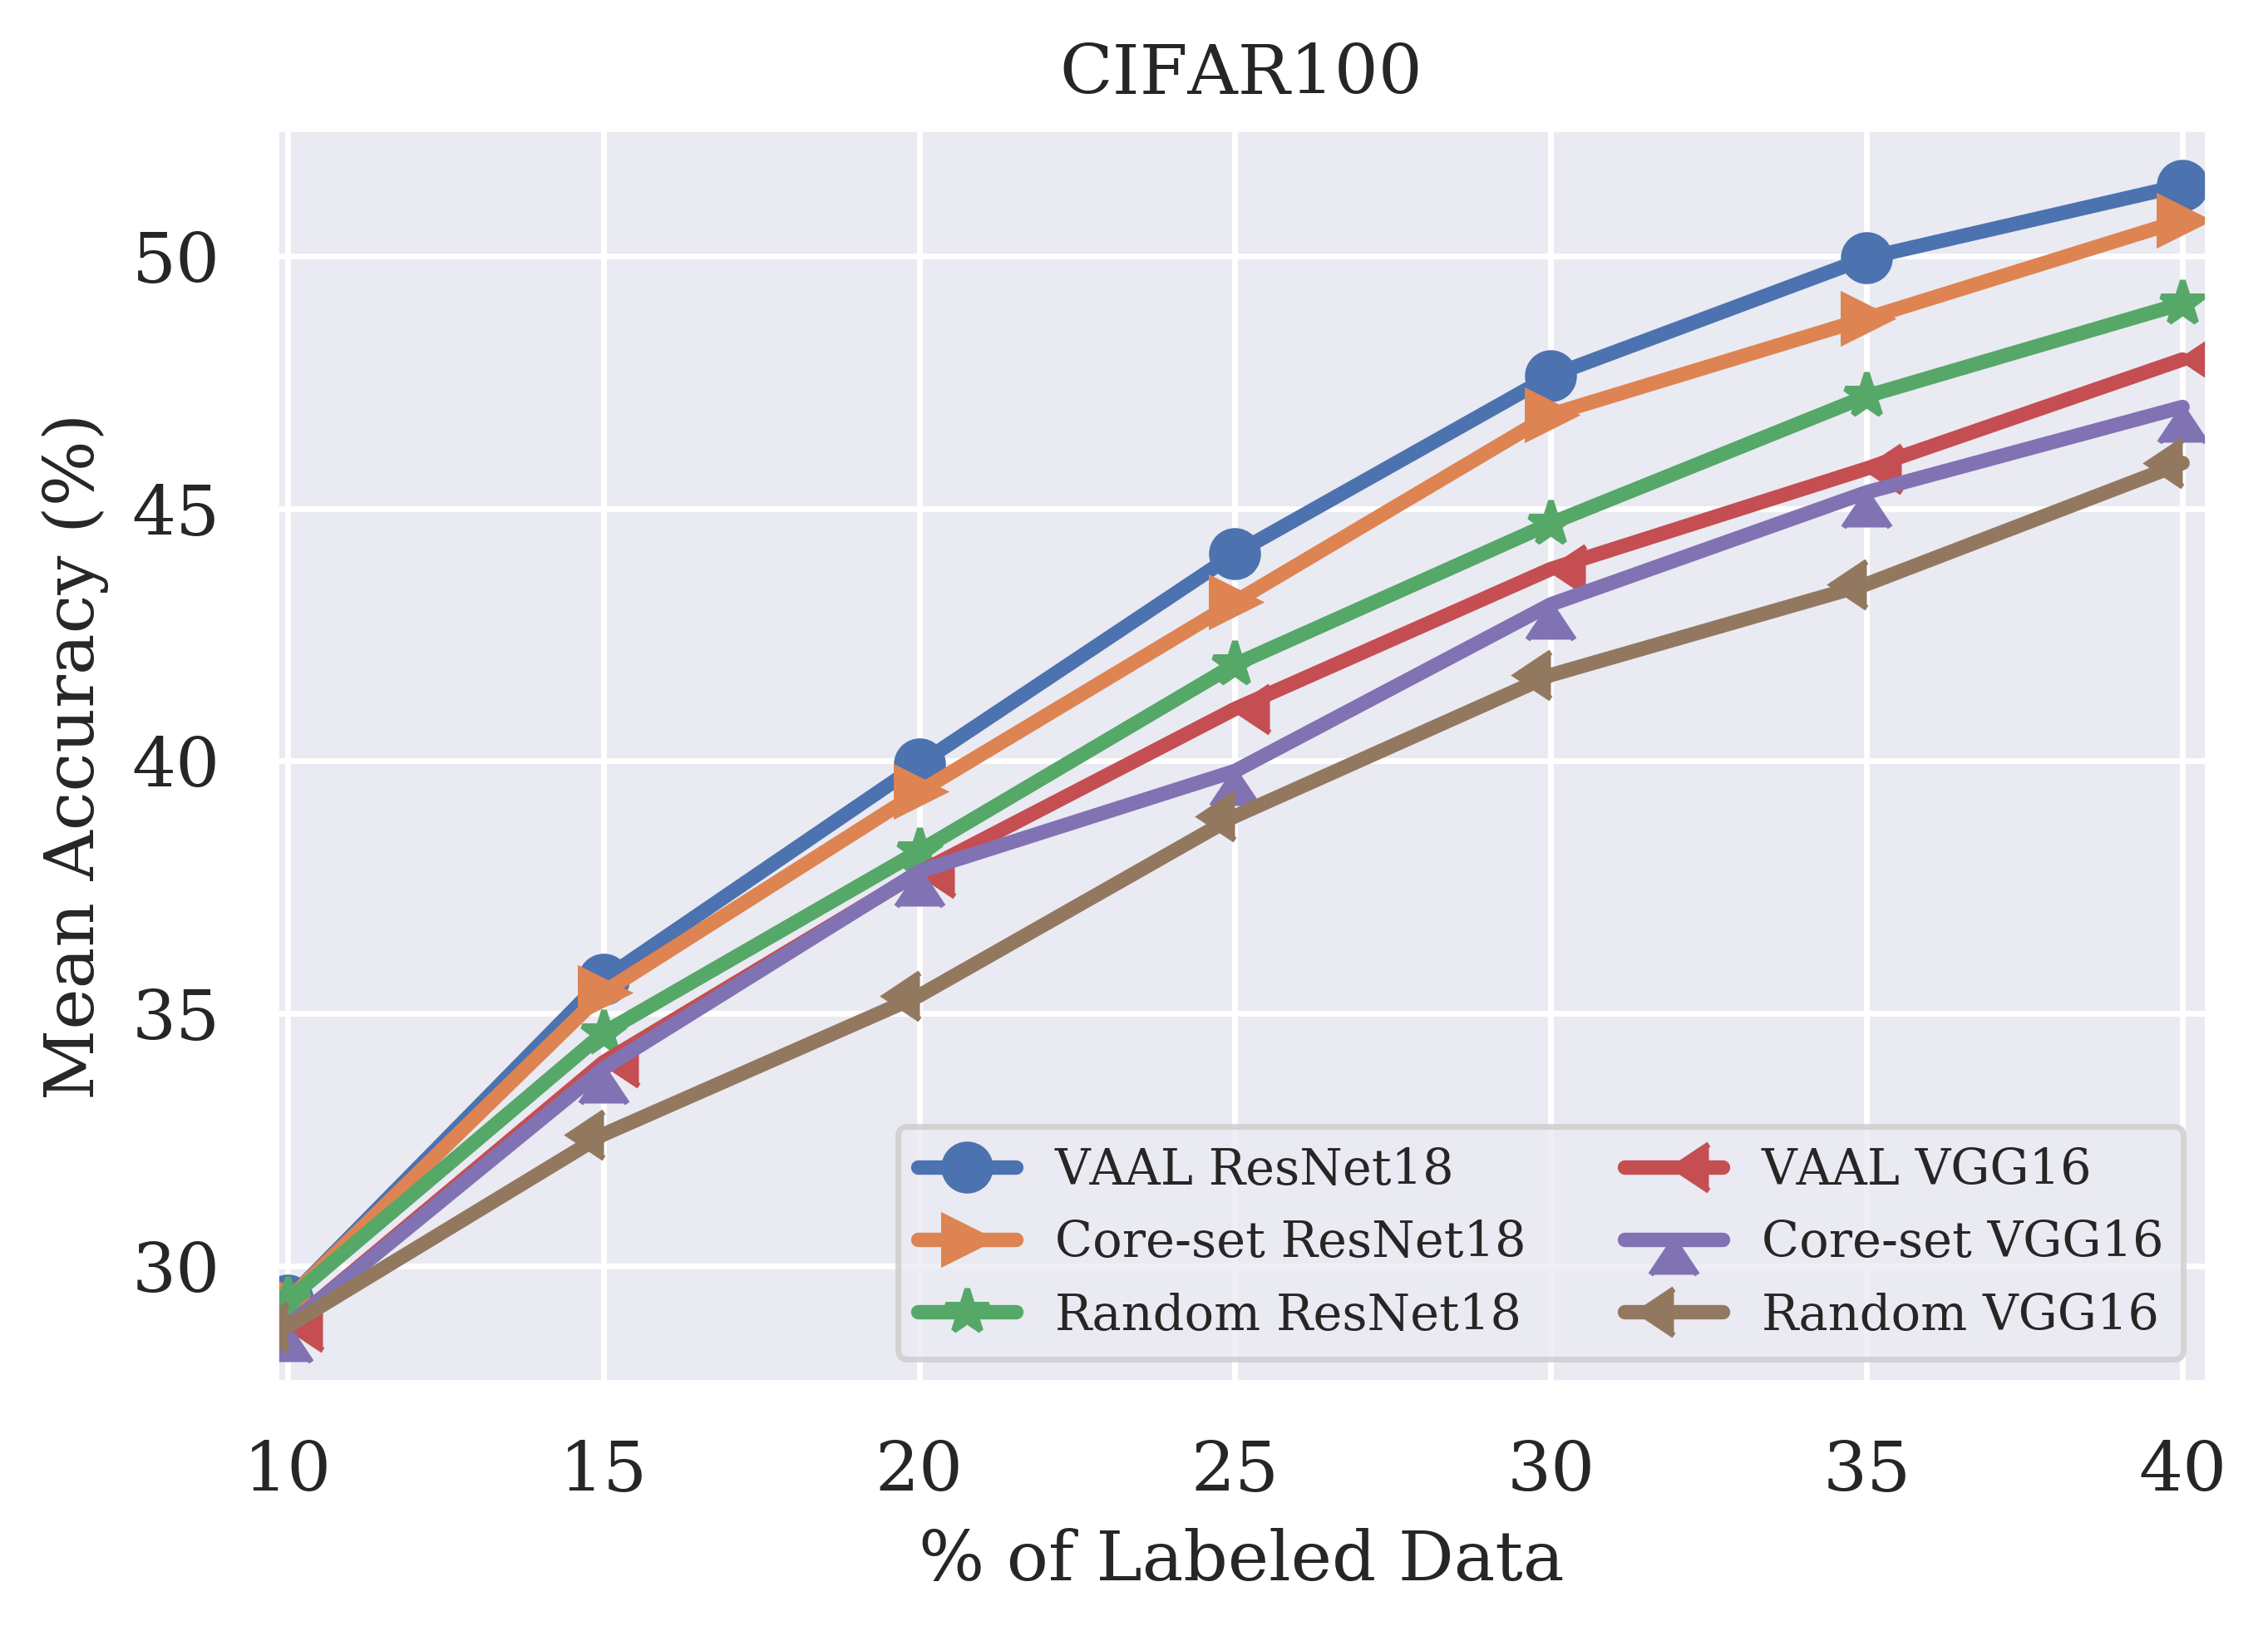

In [17]:

m={}
m['VAAL']='o'
m['Core-set']='>'
m['Ensemble']="<"
m['Random']='*'
m['Dropout']='d'
m['DBAL']='p'
m['QBC']='H'
m['emp']='s'
m['SA']=','
m['UCAL']="^"

cifar100_ratios=[100.*item for item in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]
cifar100_coreset_res = [29.315, 35.415, 39.39, 43.15, 46.86, 48.765, 50.71]
cifar100_our_res = [29.315, 35.67, 39.935, 44.105, 47.625, 49.96, 51.4]
cifar100_random_res = [29.315, 34.61, 38.215, 41.91, 44.705, 47.225, 49.06]
cifar100_coreset_vgg = [28.8, 33.91, 37.81, 39.8, 43.1, 45.32, 47.01]
cifar100_our_vgg = [28.8, 34.03, 37.79, 41.03, 43.8, 45.79, 47.95]
cifar100_random_vgg = [28.8, 32.6, 35.35, 38.905, 41.7, 43.5, 45.9]


fig, ax = plt.subplots(dpi=500)
cifar100_our_method_plot = plt.errorbar(cifar100_ratios, cifar100_our_res, label='VAAL ResNet18', marker=m['VAAL'])
cifar100_coreset_plot = plt.errorbar(cifar100_ratios, cifar100_coreset_res, label='Core-set ResNet18', marker=m['Core-set'])
cifar100_random_plot = plt.errorbar(cifar100_ratios, cifar100_random_res, label='Random ResNet18', marker=m['Random'])
cifar100_our_method_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_our_vgg, label='VAAL VGG16', marker=4)
cifar100_coreset_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_coreset_vgg, label='Core-set VGG16', marker=6)
cifar100_random_plot_vgg = plt.errorbar(cifar100_ratios, cifar100_random_vgg, label='Random VGG16', marker=8)

plt.legend(handles=[cifar100_our_method_plot, cifar100_coreset_plot, cifar100_random_plot,
                    cifar100_our_method_plot_vgg, cifar100_coreset_plot_vgg, cifar100_random_plot_vgg])
ax.set_xlim(9.8, 40.4)
plt.legend(ncol=2, loc='lower right')
plt.xlabel('% of Labeled Data')
plt.ylabel('Mean Accuracy (%)')  
plt.title('CIFAR100')
plt.grid(True)
plt.show()